# Movies Project

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import re

from datetime import datetime

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) # Adjust the configuration of the plot that we will make

## Read Data

In [2]:
df = pd.read_csv('movies.csv')

## Look at the Data

In [3]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0



1. name = name of the movies (7512 unique values)
2. rating = rating of the movie (R, PG-13, etc.)
3. genre = main genre of the film
4. year = release year
5. released = release date (YYYY-MM-DD) (3415 unique values)
6. score = IMDb user rating
7. votes = count of IMDb user votes
8. director = the director of the film (2949 unique values)
9. writer = the writer of the film (4536 unique values)
10. star = the main actor/actress of the film (2815 unique values)
11. country = country of origin
12. budget = the budget of a movie. Some movies don't have this, so it appears as 0
13. gross = revenue of the movie
14. company = the production company
15. runtime = duration of the movie

In [4]:
df['rating'].unique()

array(['R', 'PG', 'G', nan, 'Not Rated', 'NC-17', 'Approved', 'TV-PG',
       'PG-13', 'Unrated', 'X', 'TV-MA', 'TV-14'], dtype=object)

**Ratings:**

1. rating-G:

G means General Audience . All ages admitted. little kids films

2. rating-PG:

PG means Parental Guidance Suggested. Some content may not be suitable for children, parents urged to give guidance.

3. rating-R:

R means Restricted. Under 17 required accompanying parent or adult guardian.

4. rating-(NC-17):

Means Adults only. under 17 are not permitted to watch movie.

5. rating-(PG-13):

Means Parents strongly Cautioned. So under 13 are not admitted to watch movie.

6. rating-X:

not suitable to be seen by people under 18 because of violence,offensive language or etc.

7. unrated:

A version of the movie that has not been submitted for a rating.

8. rating-(TV-PG):

This Program contains material that parents may find unsuitable for younger children.

9. rating-(TV-14):

This program contains material that most parents would find unsuitable for childrens under 14 years of age.

10. rating-(TV-MA):

This program is specifically designed for matured adults and unsuitable for children under 17.

In [5]:
df['genre'].unique()

array(['Drama', 'Adventure', 'Action', 'Comedy', 'Horror', 'Biography',
       'Crime', 'Fantasy', 'Family', 'Sci-Fi', 'Animation', 'Romance',
       'Music', 'Western', 'Thriller', 'History', 'Mystery', 'Sport',
       'Musical'], dtype=object)

**Genre:**

1. Drama:

Drama films focus on a conflict between characters or forces (either internal or external) and often contain strong emotional themes.

2. Adventure:

Adventure films are characterized by excitement and exploration, including exotic settings and thrilling action sequences.

3. Action:

Action films usually involve physical stunts, chases, fights, and explosions, and often have a protagonist who is a hero.

4. Comedy:

Comedy films are designed to make the audience laugh. They often use irony, slapstick, or other forms of humor.

5. Horror:

Horror films are designed to frighten and disturb the viewer. They often deal with supernatural themes and often feature jump scares.

6. Biography:

Biographical films tell the story of a real person or event. They often focus on a specific period in the person's life.

7. Crime:

Crime films often focus on a particular criminal act or criminal. They often explore themes of justice, morality, and revenge.

8. Fantasy:

Fantasy films create a world of imagination, often involving magic, mythical creatures, and extraordinary characters.

9. Family:

Family films tell stories that appeal to a wide range of ages, often involving themes of love, family dynamics, and coming-of-age.

10. Sci-Fi:

Sci-fi films explore the possibilities of science, technology, and the future. They often involve futuristic settings and stories involving alien life forms.

11. Animation:

Animation films use a variety of techniques to bring characters and stories to life.

12. Romance:

Romance films focus on the romantic relationship between two characters. They often feature romantic moments, love triangles, and happy endings.

13. Music:

Music films tell stories through song and dance. They often focus on a particular artist or genre of music.

14. Western:

Western films tell stories of the American Old West. They often feature characters such as cowboys, outlaws, and lawmen.

15. Thriller:

Thriller films build suspense and tension, often through a series of twist and turns. They often feature a protagonist in a dangerous situation.

16. History:

Historical films tell stories set in the past. They often explore themes such as politics, warfare, and social change.

17. Mystery:

Mystery films are designed to keep the audience guessing. They often involve unsolved puzzles or crimes.

18. Sport:

Sports films tell stories of competition, often involving athletes striving to reach their goals.

19. Musical:

Musical films use song and dance to tell stories. They often feature elaborate musical numbers and fantasy sequences.

## Check Data Types

In [6]:
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [8]:
df.shape

(7668, 15)

In [9]:
df.columns

Index(['name', 'rating', 'genre', 'year', 'released', 'score', 'votes',
       'director', 'writer', 'star', 'country', 'budget', 'gross', 'company',
       'runtime'],
      dtype='object')

## Check Missing Data

In [10]:
# checking if the dataset has missing data
df.isnull().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [11]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))
    

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [12]:
#pip install missingno

In [13]:
import missingno as msn

<Axes: >

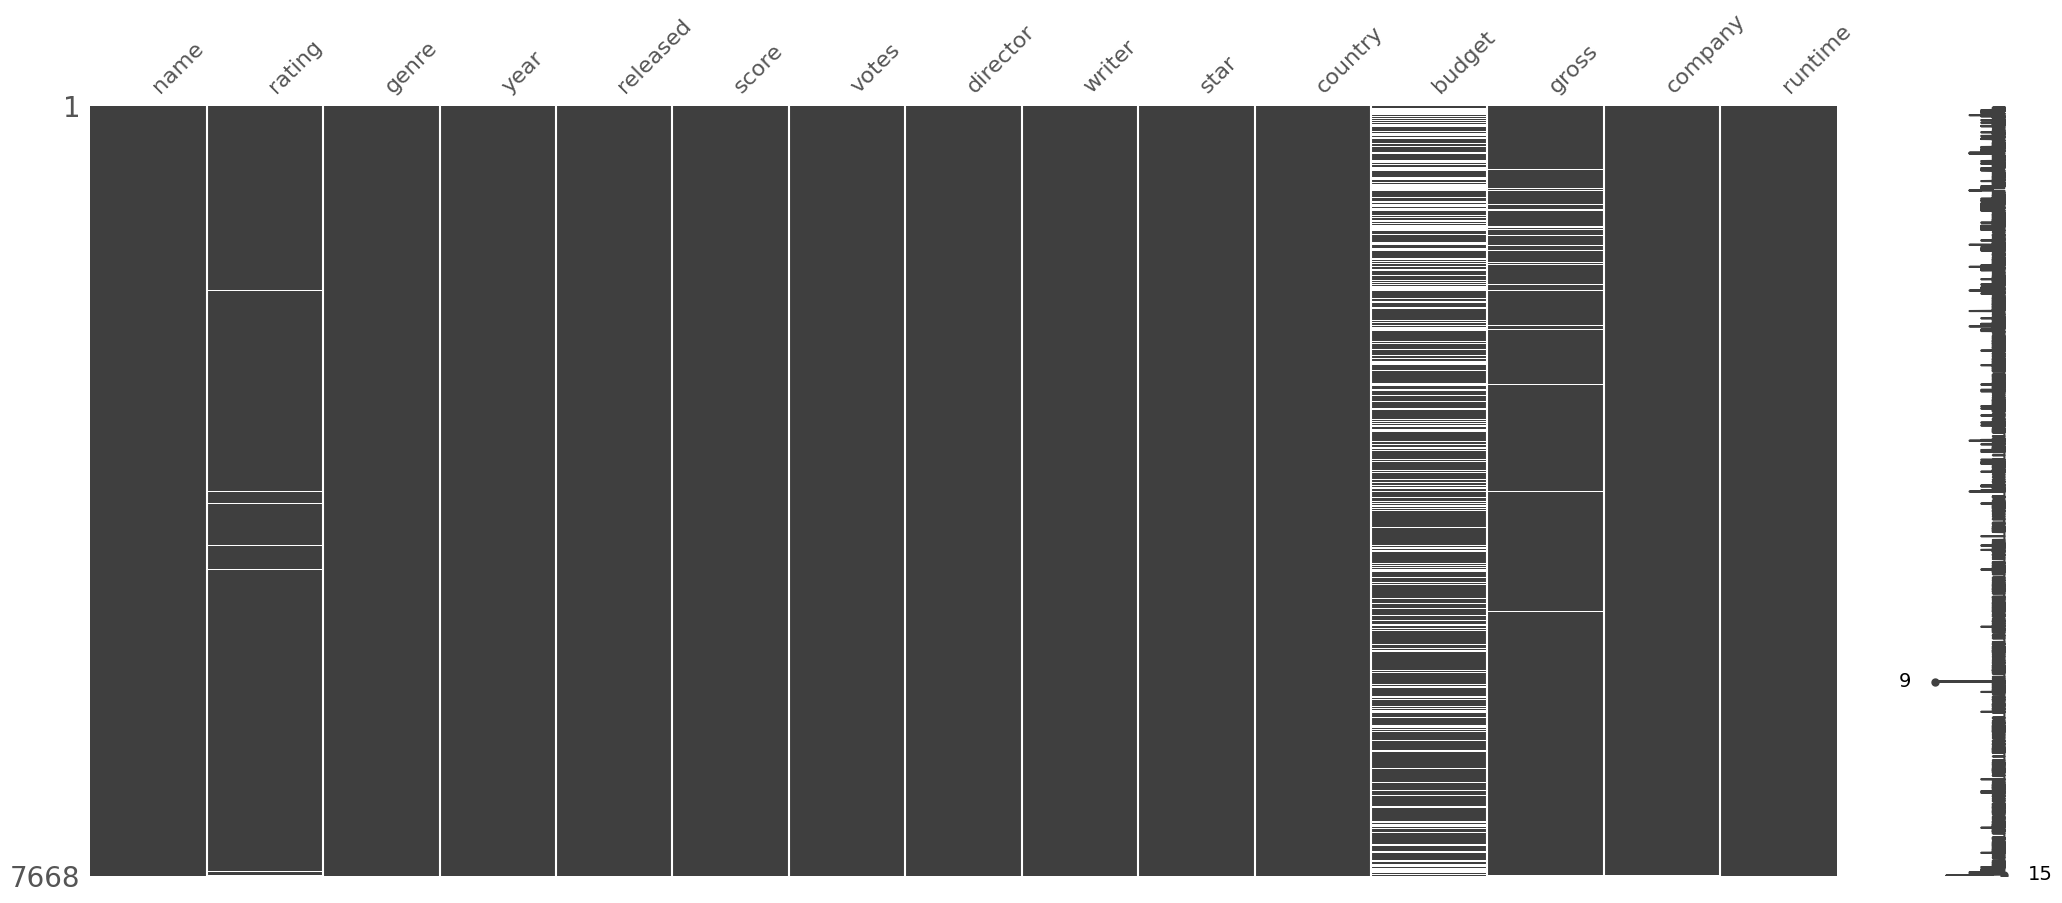

In [14]:
msn.matrix(df)

<Axes: >

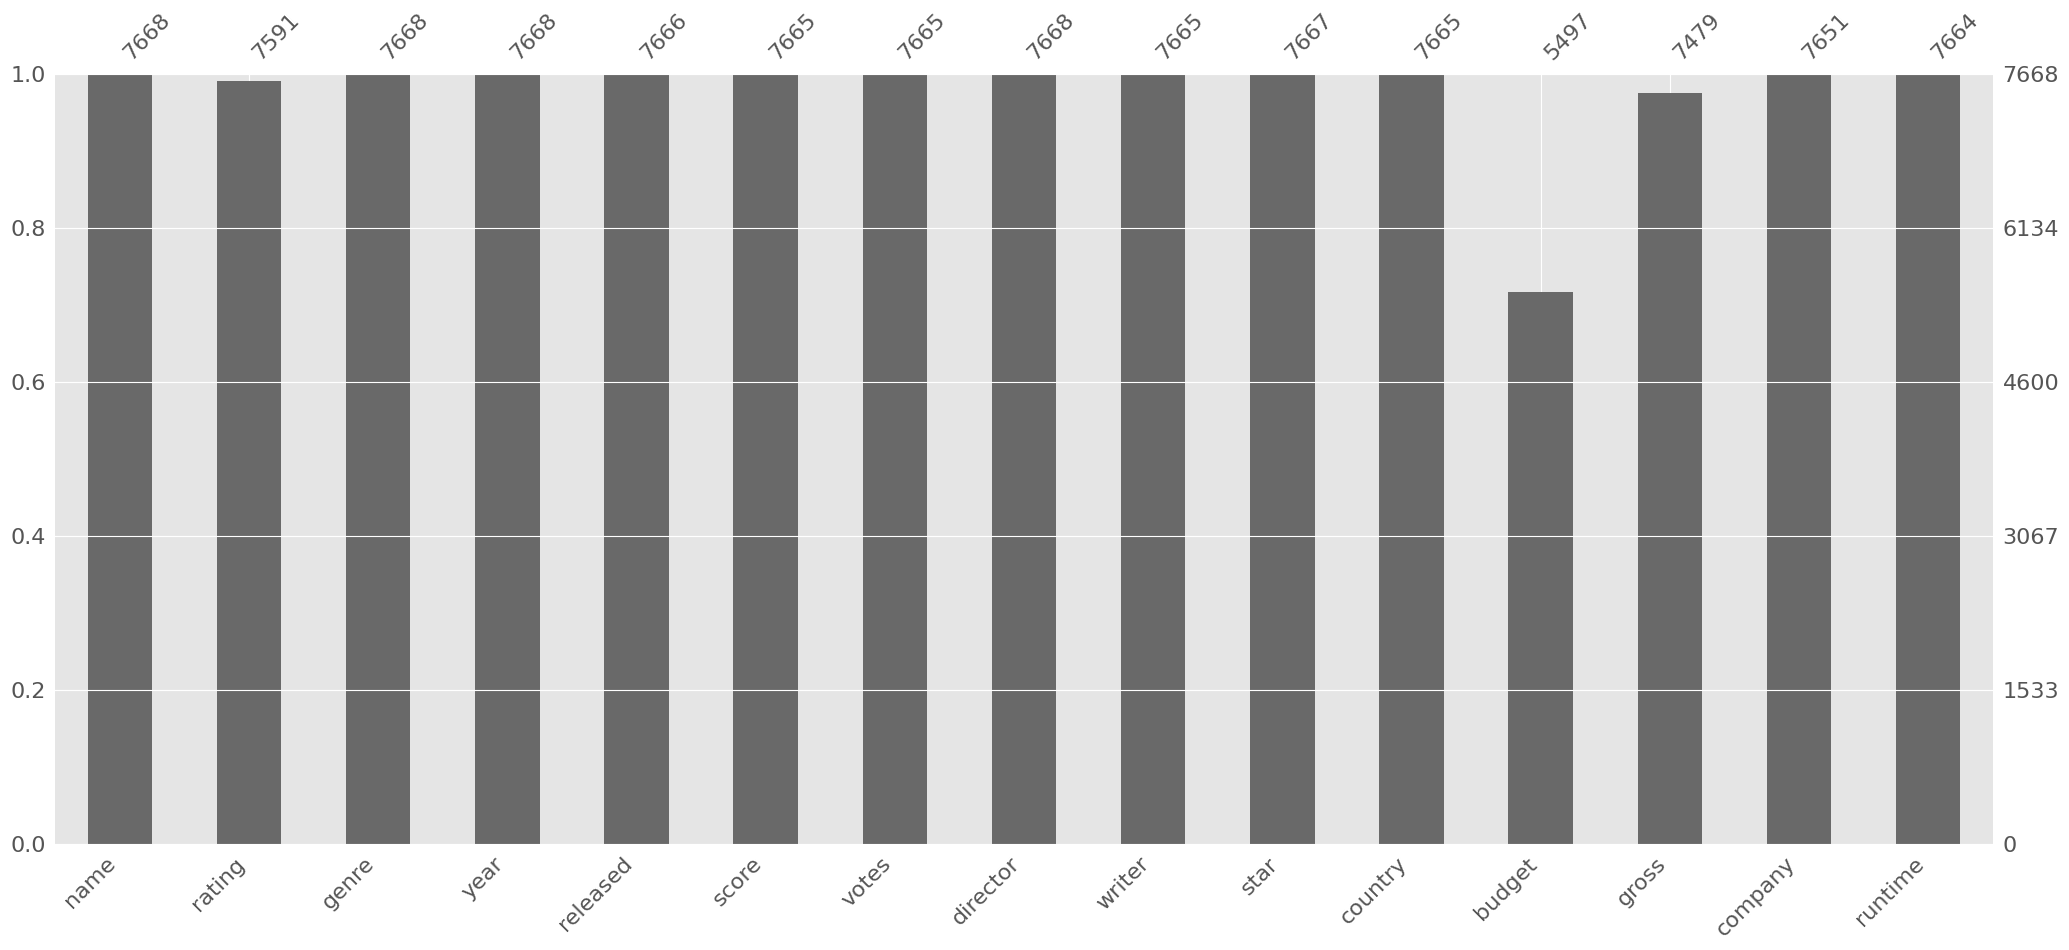

In [15]:
msn.bar(df) 

This code is using a for loop to iterate over all the columns in a pandas dataframe (df).

For each column, it calculates the percentage of missing values by using the NumPy library's np.mean() function to compute the mean of the boolean array returned by df[col].isnull().

Finally, the code prints out the column name and the percentage of missing values in that column using the print() function with a formatted string that uses the format() method to insert the values of the col and pct_missing variables into the string.

## Data Cleaning

In [16]:
dfc = df.copy()
dfc

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0


In [17]:
y = dfc['released'].str.replace(")","").str.split("(",expand=True).rename(columns={0:'released_date',1:'released_place'})
y

/var/folders/2v/3x8wpnt175z2g7523fqrddz80000gn/T/ipykernel_4725/2070861439.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  y = dfc['released'].str.replace(")","").str.split("(",expand=True).rename(columns={0:'released_date',1:'released_place'})


,released_date,released_place
0,"June 13, 1980",United States
1,"July 2, 1980",United States
2,"June 20, 1980",United States
3,"July 2, 1980",United States
4,"July 25, 1980",United States
...,...,...
7663,"October 23, 2020",United States
7664,"February 7, 2020",United States
7665,"April 27, 2020",Cameroon
7666,"October 1, 2020",United States


- Assuming dfc is a DataFrame object with a column called "released", this code is performing the following operations:

1. dfc['released'].str.replace(")","") - This code is replacing all occurrences of ")" in the "released" column with an empty string.
2. dfc['released'].str.split("(",expand=True) - This code is splitting the "released" column into two new columns at every occurrence of "(", and expanding the result into two separate columns. The first column will contain the text before the first "(", and the second column will contain the text after the first "(".
3. rename(columns={0:'released_date',1:'released_place'}) - This code is renaming the two new columns created in step 2 to "released_date" and "released_place", respectively.
4. y - This code is assigning the resulting DataFrame to a new variable called "y".

So, overall, this code is creating a new DataFrame called "y" from the "released" column of the original DataFrame, with two new columns for the released date and released place. It achieves this by replacing ")" characters in the "released" column with an empty string, splitting the resulting text at every "(", and then renaming the resulting columns appropriately.

In [18]:
dfc.insert(4,'released_date',y['released_date'])
dfc

,name,rating,genre,year,released_date,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980","June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980","July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980","June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980","July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980","July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020","October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020","February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020","April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020","October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0


In [19]:
dfc.insert(5,'released_place',y['released_place'])
dfc

,name,rating,genre,year,released_date,released_place,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980",United States,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980",United States,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980",United States,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980",United States,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980",United States,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020",United States,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020",United States,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020",Cameroon,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020",United States,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0


In [20]:
# drop released column to avoid double
dfc.drop(['released'],axis=1,inplace=True)

In [21]:
dfc.head(2)

,name,rating,genre,year,released_date,released_place,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980",United States,8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980",United States,5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0


In [22]:
# converting to DateTime.
dfc['released_date'] = dfc['released_date'].astype(str).astype('datetime64')
dfc.head(2)

,name,rating,genre,year,released_date,released_place,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,1980-06-13,United States,8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,1980-07-02,United States,5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0


In [23]:
dfc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   name            7668 non-null   object        
 1   rating          7591 non-null   object        
 2   genre           7668 non-null   object        
 3   year            7668 non-null   int64         
 4   released_date   7666 non-null   datetime64[ns]
 5   released_place  7666 non-null   object        
 6   score           7665 non-null   float64       
 7   votes           7665 non-null   float64       
 8   director        7668 non-null   object        
 9   writer          7665 non-null   object        
 10  star            7667 non-null   object        
 11  country         7665 non-null   object        
 12  budget          5497 non-null   float64       
 13  gross           7479 non-null   float64       
 14  company         7651 non-null   object        
 15  runt

In [24]:
# Checking For the Duplicate Rows.
dfc.duplicated().value_counts() #True means duplicate rows.

False    7668
dtype: int64

We don't have any duplicate rows in our data.

In [25]:
dfc.describe()

,year,score,votes,budget,gross,runtime
count,7668.000000,7665.000000,7.665000e+03,5.497000e+03,7.479000e+03,7664.000000
mean,2000.405451,6.390411,8.810850e+04,3.558988e+07,7.850054e+07,107.261613
std,11.153508,0.968842,1.633238e+05,4.145730e+07,1.657251e+08,18.581247
min,1980.000000,1.900000,7.000000e+00,3.000000e+03,3.090000e+02,55.000000
25%,1991.000000,5.800000,9.100000e+03,1.000000e+07,4.532056e+06,95.000000
50%,2000.000000,6.500000,3.300000e+04,2.050000e+07,2.020576e+07,104.000000
75%,2010.000000,7.100000,9.300000e+04,4.500000e+07,7.601669e+07,116.000000
max,2020.000000,9.300000,2.400000e+06,3.560000e+08,2.847246e+09,366.000000


In [26]:
# checking if the dataset has missing data
dfc.isnull().sum().sort_values(ascending=False)

budget            2171
gross              189
rating              77
company             17
runtime              4
score                3
votes                3
writer               3
country              3
released_date        2
released_place       2
star                 1
name                 0
genre                0
year                 0
director             0
dtype: int64

Text(0.5, 1.0, 'Pointing Null Values In Columns')

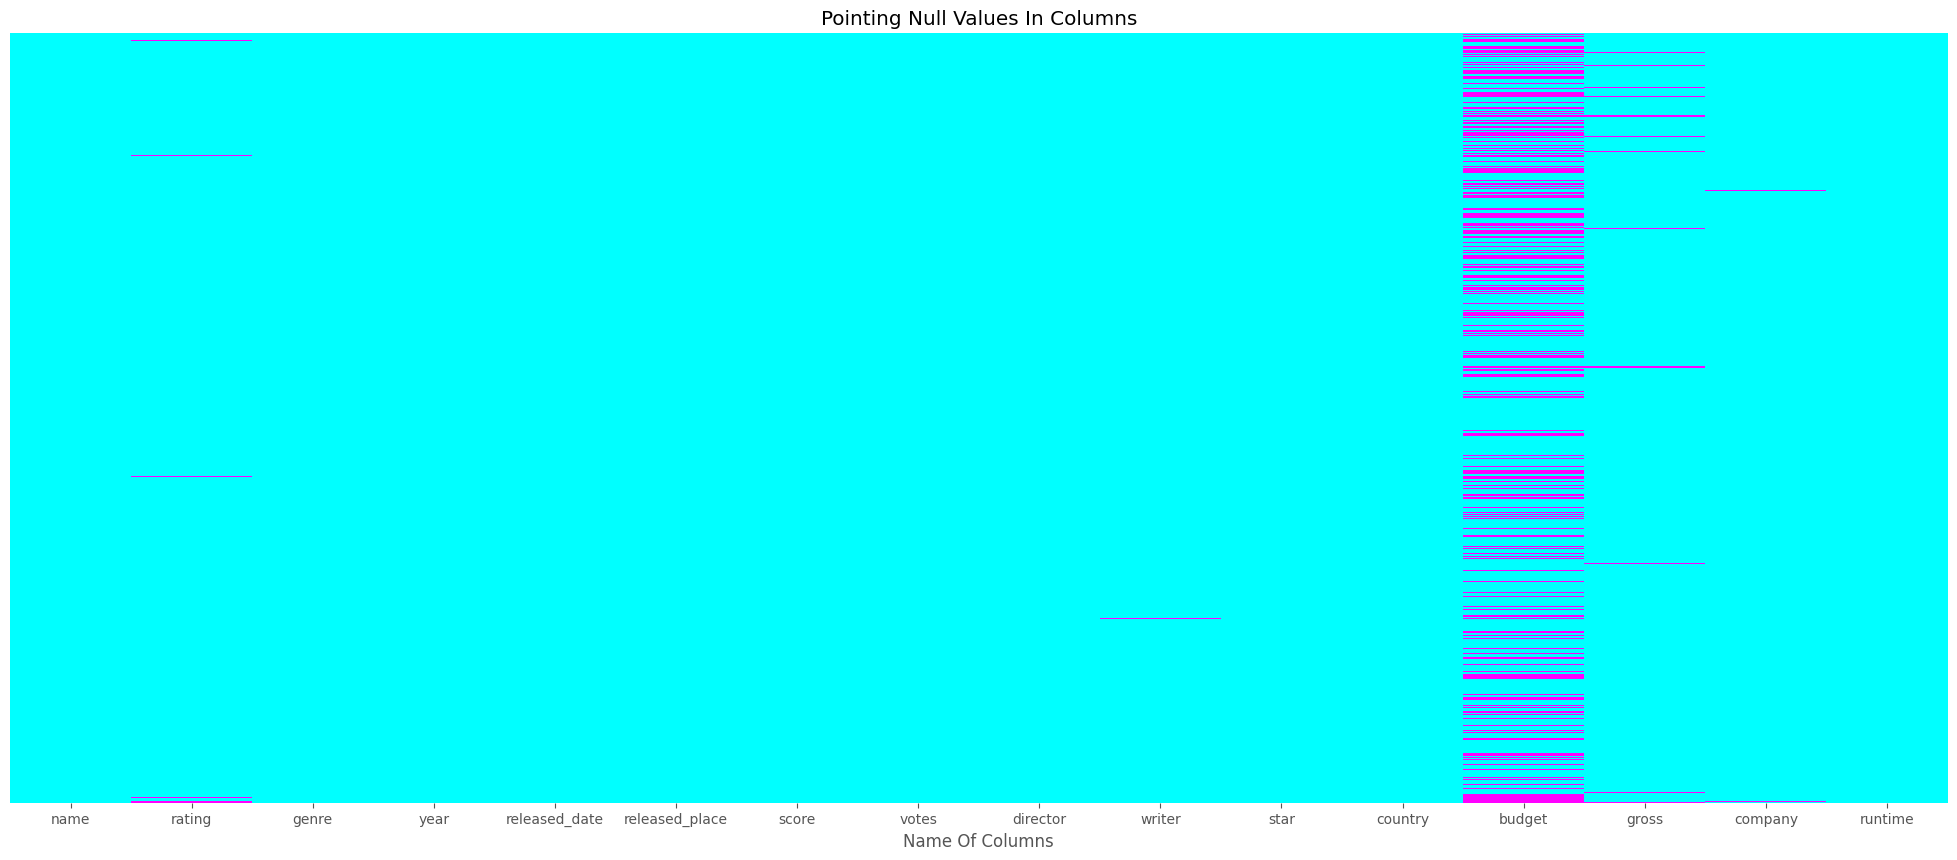

In [27]:
# Visulaizing null values through heatmap.
plt.figure(figsize=(25, 10))
sns.heatmap(dfc.isnull(), cbar=False, yticklabels=False,cmap='cool')
plt.xlabel("Name Of Columns")
plt.title("Pointing Null Values In Columns")

So we have null values in 12 columns , in that 6 object dtype , 5 float64 dtype and 1 is datetime64.
1. For float64 dtype columns I fill with "0". Those columns are {runtime, score, votes}. For budget and gross I need to take np.mean to fill the null.

2. For object dtype columns I fill with "Others". Those columns are {rating,company,writer,country,releaced_place,star}.

3. For datetime64 dtype column(released_date) I fill with "0000-00-00".

In [28]:
# fill the null values

columns_1 = ['rating','company','writer','country','released_place','star']
for i in columns_1:
    dfc[i].fillna("Others",inplace=True)

columns_2 = ['runtime','score','votes']
for j in columns_2:
    dfc[j].fillna(0,inplace=True) 
columns_3 = ['budget','gross']
for k in columns_3:
    dfc[k].fillna(round(np.mean(dfc[k])),inplace=True)

- Assuming dfc is a DataFrame object with several columns, this code is performing the following operations:

1. columns_1 = ['rating','company','writer','country','released_place','star'] - This code creates a list of column names that the code will check for missing values.
2. for i in columns_1: dfc[i].fillna("Others",inplace=True) - This code loops through the columns in columns_1 and fills any missing values in those columns with the string "Others".
3. columns_2 = ['runtime','score','votes'] - This code creates another list of column names that the code will check for missing values.
4. for j in columns_2: dfc[j].fillna(0,inplace=True) - This code loops through the columns in columns_2 and fills any missing values in those columns with the value 0.
5. columns_3 = ['budget','gross'] - This code creates a third list of column names that the code will check for missing values.
6. for k in columns_3: dfc[k].fillna(round(np.mean(dfc[k])),inplace=True) - This code loops through the columns in columns_3 and fills any missing values in those columns with the mean of that column, rounded to the nearest integer.

So overall, this code is filling missing values in selected columns of the dfc DataFrame. The missing values in columns rating, company, writer, country, released_place, and star are filled with the string "Others". The missing values in columns runtime, score, and votes are filled with the value 0. Finally, the missing values in columns budget and gross are filled with the mean of the respective column, rounded to the nearest integer.

In [29]:
dfc

,name,rating,genre,year,released_date,released_place,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,1980-06-13,United States,8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,1980-07-02,United States,5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,1980-06-20,United States,8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,1980-07-02,United States,7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,1980-07-25,United States,7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,Others,Drama,2020,2020-10-23,United States,3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,78500541.0,Others,90.0
7664,Dream Round,Others,Comedy,2020,2020-02-07,United States,4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,35589876.0,78500541.0,Cactus Blue Entertainment,90.0
7665,Saving Mbango,Others,Drama,2020,2020-04-27,Cameroon,5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,78500541.0,Embi Productions,0.0
7666,It's Just Us,Others,Drama,2020,2020-10-01,United States,0.0,0.0,James Randall,James Randall,Christina Roz,United States,15000.0,78500541.0,Others,120.0


In [30]:
dfc['released_date'].fillna('0000-00-00',inplace=True)

Assuming dfc is a DataFrame object that contains a column called "released_date", this code is performing the following operation:

dfc['released_date'].fillna('0000-00-00', inplace=True)

This code fills any missing values in the "released_date" column with the string "0000-00-00". The fillna() method is used to replace any NaN values in the column with the specified value. The inplace=True argument is used to modify the original DataFrame object rather than creating a copy of it.

So, overall, this code is replacing any missing values in the "released_date" column with the string "0000-00-00" in the dfc DataFrame. This may be useful if missing values in this column are causing issues with subsequent analysis or visualization.

In [31]:
dfc.isna().sum().sort_values(ascending=False)[:-4].reset_index().rename(columns={"index":"columns",0:"Null_Values"})

,columns,Null_Values
0,name,0
1,rating,0
2,genre,0
3,year,0
4,released_date,0
5,released_place,0
6,score,0
7,votes,0
8,director,0
9,writer,0


In [32]:
dfc.shape

(7668, 16)

In [33]:
dfc.to_csv("Movie_industry.csv")

## Data Driven Decision Making.

**Ask:**
1. What are the top 5 highest grossing movies in the movie industry?

Analysis:

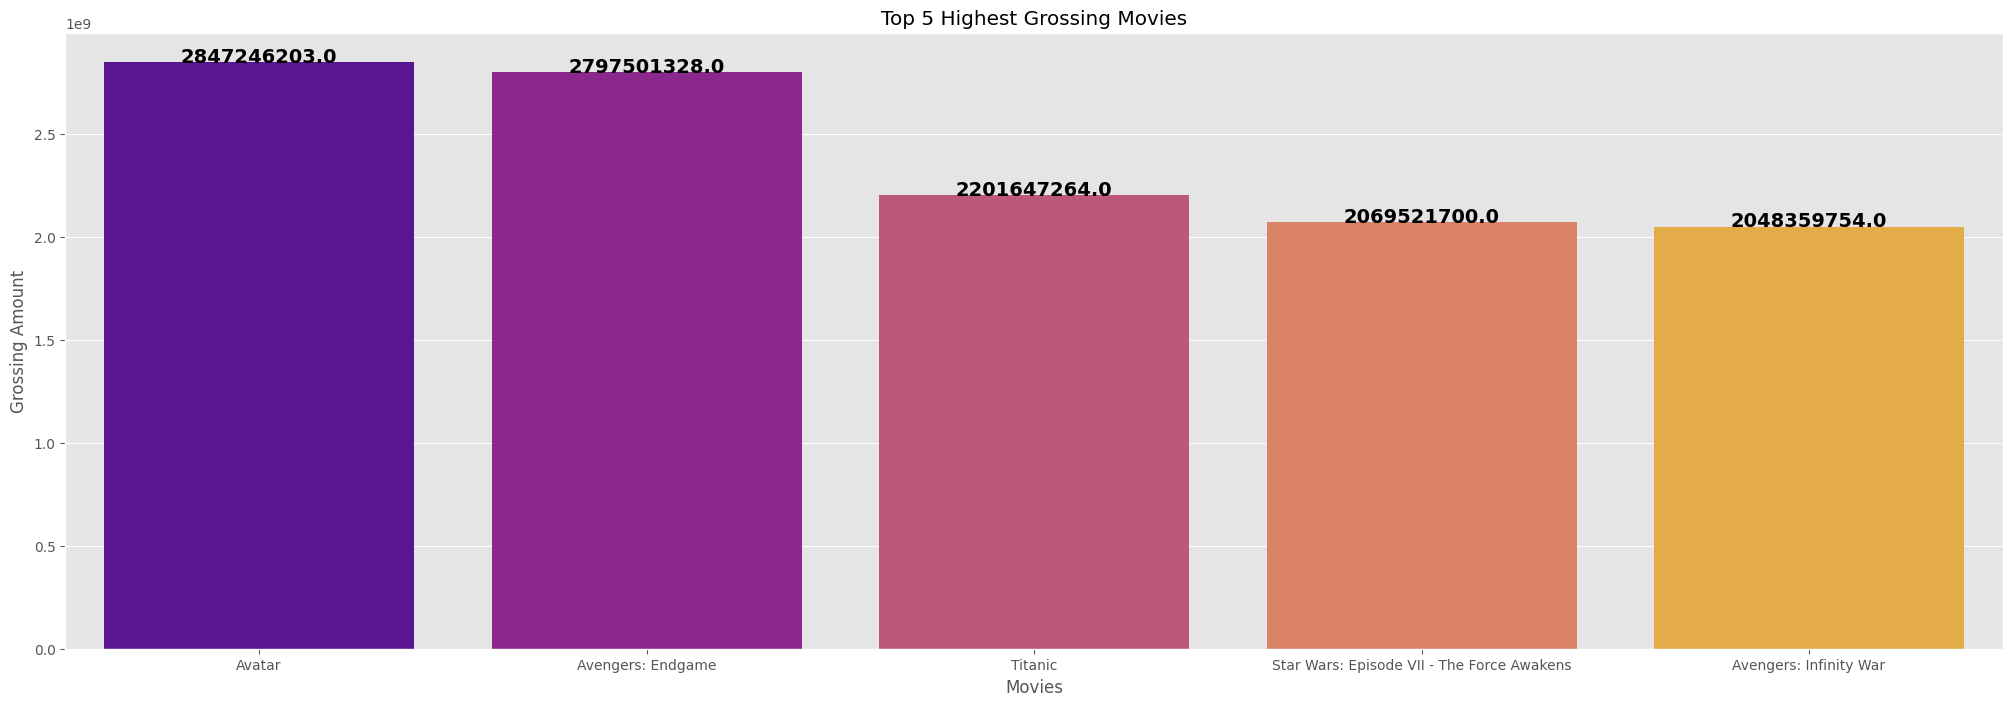

In [42]:
# A bar chart would be the most appropriate visualization for this data. 
#The x-axis would be the top 5 highest grossing movies and the y-axis would be the grossing amounts in monetary units. 
#The bars would be different colors to make it more visually appealing.
plt.figure(figsize=(25,8))
ax = sns.barplot(x='name',y='gross',data=dfc.sort_values(by='gross',ascending=False).head(),palette='plasma')
plt.xlabel('Movies')
plt.ylabel('Grossing Amount')
plt.title('Top 5 Highest Grossing Movies')

# Add text labels to the bars
for i, v in enumerate(dfc.sort_values(by='gross',ascending=False).head()['gross']):
    ax.text(i, v, str(v), ha='center', fontsize=14, fontweight='bold', color='black')

plt.show()

Insight:

1. There is 5 top highest grossing movies in the movie industry, and it is: Avatar, Avengers: Endgame, Titanic Movies, Star Wars: Episode VII - The Force Awakens, Avengers: Infinity War

2. There is two pairs movies that almost equal in terms of gross collections, and it is:
    - Avatar and Avengers: Endgame
    - Star Wars:Episode VII - The Force Awakens and Avengers:Infinity War


**Ask:**

2. What are the most popular genres of movies?

Analysis:

Text(0.5, 1.0, 'The Most Popular Genres Of Movies')

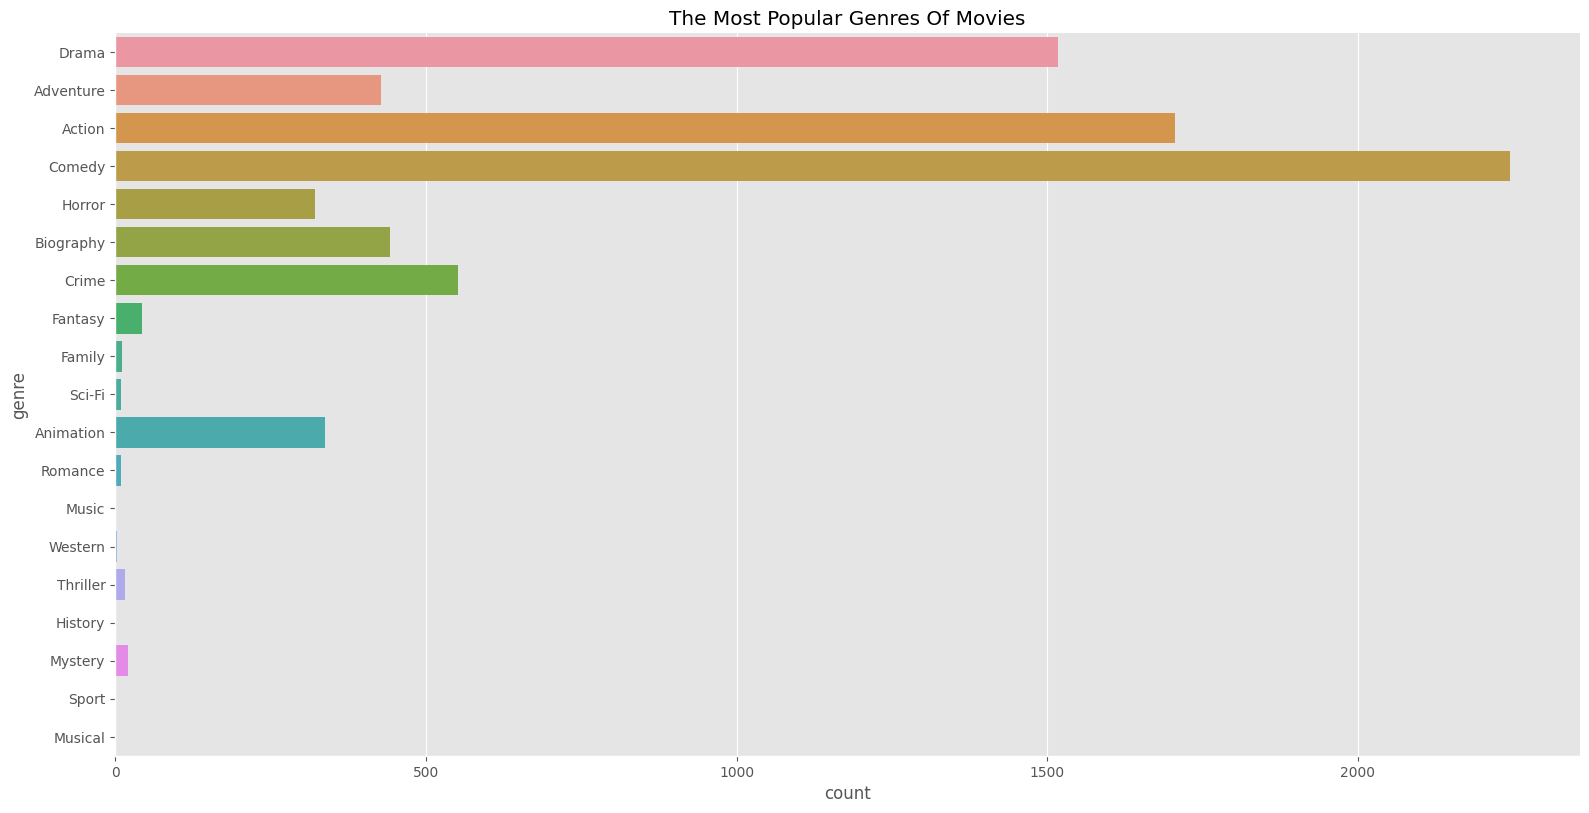

In [35]:
# Plot bar chart with total movies of each genre
sns.catplot(y='genre', kind='count', data=dfc,height=8, aspect=2);
plt.title('The Most Popular Genres Of Movies')

First, the code calculates the number of occurrences of each genre in the "genre" column of the DataFrame using the "value_counts()" method of pandas. The result is stored in the "genre_counts" variable.

Then, the code creates a bar plot using the "barplot()" function of Seaborn. The y-axis of the plot is set to the index of the "genre_counts" variable, which represents the unique genres in the "genre" column. The x-axis is set to the values of the "genre_counts" variable, which represent the count of movies in each genre.

Next, the code adds a title to the plot using the "title()" method of matplotlib. The x-label and y-label of the plot are also set using the "xlabel()" and "ylabel()" methods of matplotlib, respectively.

Finally, the code adds text labels to each bar of the plot to display the count of movies for each genre using the "text()" method of matplotlib. This is done using a "for" loop that iterates over the values of the "genre_counts" variable, and the "enumerate()" function to get the index of each value. The "text()" method is used to add a text label to each bar, with the count value and the genre name displayed.

Overall, the code creates a bar plot that displays the count of movies in each genre, and adds text labels to each bar to make the counts more visible.

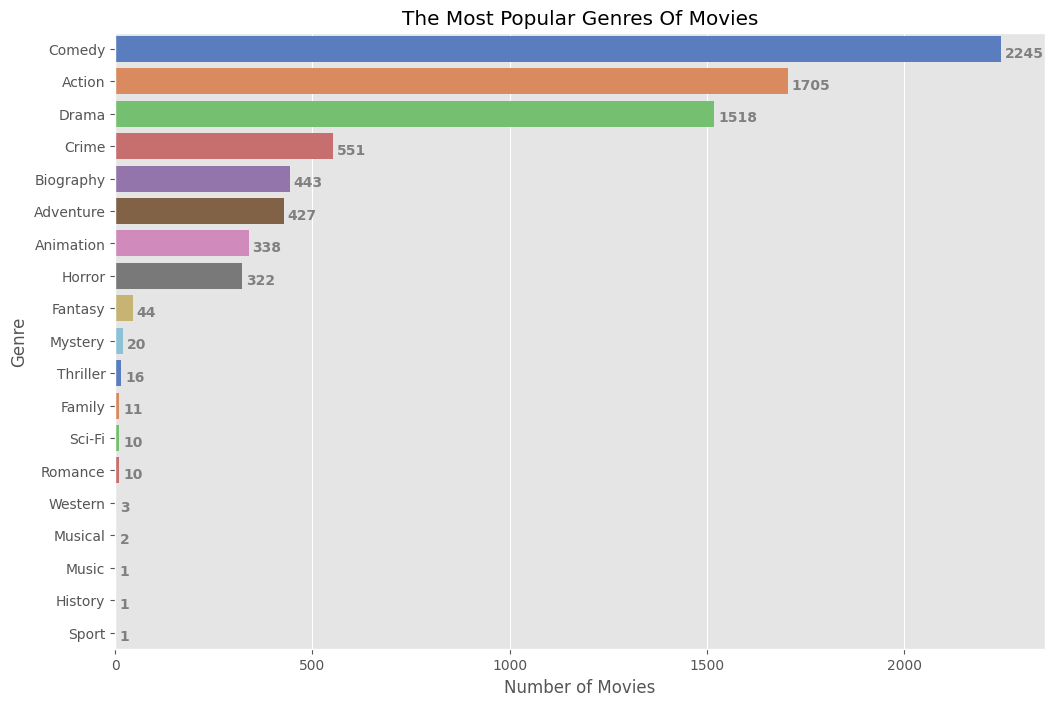

In [39]:
# Count the number of occurrences of each genre in the "genre" column of the DataFrame
genre_counts = dfc['genre'].value_counts()

# Create a bar plot using seaborn
plt.figure(figsize=(12,8))
sns.barplot(y=genre_counts.index, x=genre_counts.values, palette='muted')
plt.title('The Most Popular Genres Of Movies')
plt.xlabel('Number of Movies')
plt.ylabel('Genre')

# Add text labels to the bars
for i, v in enumerate(genre_counts.values):
    plt.text(v + 10, i + .25, str(v), color='gray', fontweight='bold')

plt.show()

In [37]:
count_series = dfc['genre'].value_counts()
print(count_series)


Comedy       2245
Action       1705
Drama        1518
Crime         551
Biography     443
Adventure     427
Animation     338
Horror        322
Fantasy        44
Mystery        20
Thriller       16
Family         11
Sci-Fi         10
Romance        10
Western         3
Musical         2
Music           1
History         1
Sport           1
Name: genre, dtype: int64


This code will create a pandas Series object called count_series that contains the count of each unique value in the "column_name" column of the df DataFrame. The value_counts() method sorts the values in descending order, so the most common value will be listed first.

Insight:

1. Top 5 most genre = First: Comedy, Second: Action, Third: Drama, Fourth: Crima, Last: Biography.

2. Top 5 least Popular Genres = History, Sports, Music, Musical, Western.

3. There is 2 pairs kind of genre that almost equally:
    - Adventure and Biography
    - Horror, Animation.

4. Science fiction, family and romance are the three equally least popular genres.

**Ask:**

3. What is the average budget of each genre?

Analysis:

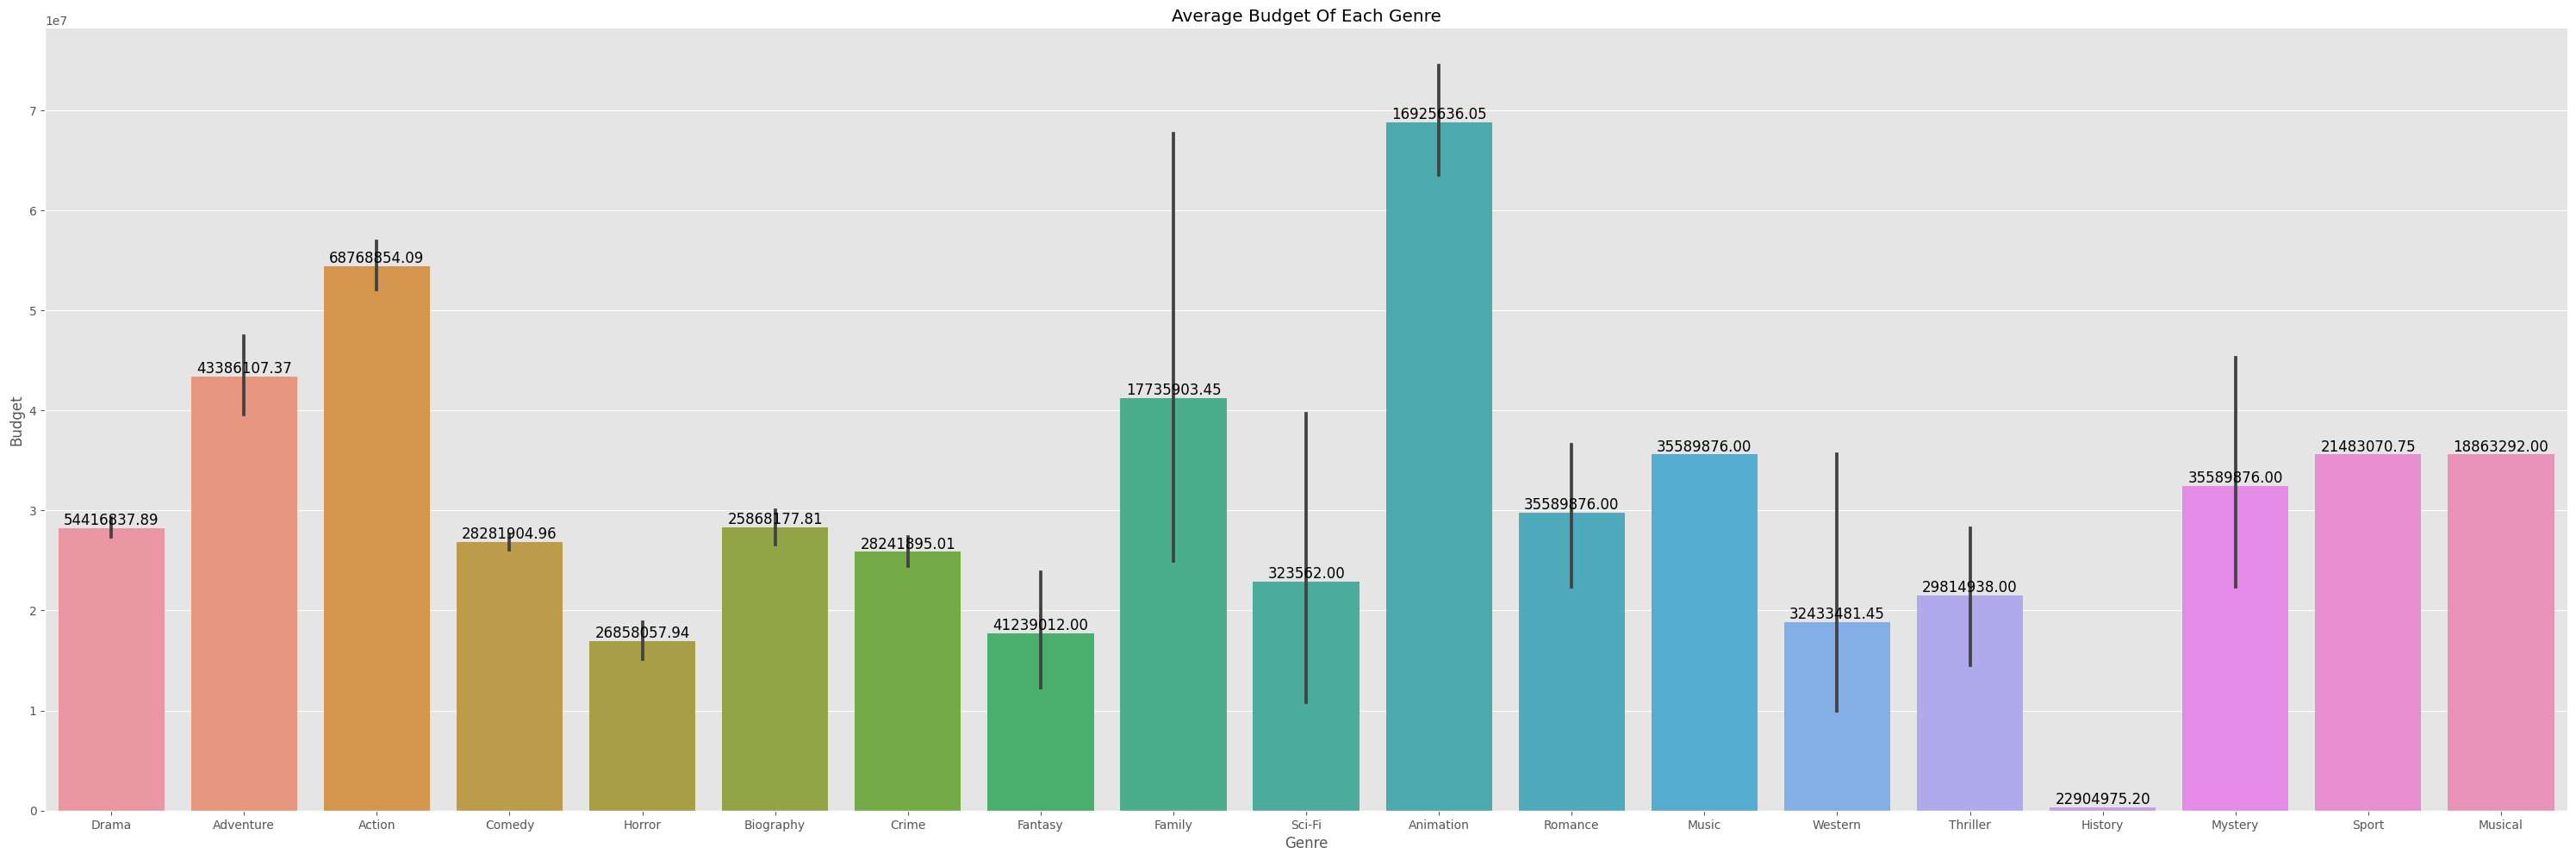

In [44]:
# Plot bar chart with average budget of each genre
ax = sns.catplot(x='genre', y='budget', kind='bar', data=dfc, height=10, aspect=3)
plt.xlabel('Genre')
plt.ylabel('Budget')
plt.title('Average Budget Of Each Genre')

# Add text labels to the bars
for i, bar in enumerate(ax.ax.patches):
    # Get the height of the bar
    height = bar.get_height()
    # Add text label above the bar with the budget value rounded to 2 decimal places
    ax.ax.text(bar.get_x() + bar.get_width() / 2, height + 0.5, f'{dfc.groupby("genre")["budget"].mean().iloc[i]:.2f}', ha='center', va='bottom', fontsize=12)

plt.show()


In this modified code, the annotate() method is used to add text labels to the bars. The enumerate() function is used to loop over the bars, and the get_height() and get_x() methods are used to position the text label above each bar. The groupby() and mean() methods are used to calculate the average budget for each genre, and the iloc indexer is used to select the budget value for the current genre in the loop. The f-string syntax is used to format the budget value as a string rounded to 2 decimal places.

Insight:
1. Here the budget of animated movies is at the top. The average budget of an animated movie is around 69 million US dollars.

2. Music, Sports and Musical Genres spend their budget equally. There approximate budget is 35 million US dollars.

3. The second highest budget investment happens in action films. The average budget of action movies is 55 million US dollars.

4. The third highest budget investment happens in adventure films. The average budget of action movies is 44 million US dollars.

5. Animation, action, and adventure movies require more budget because they involve a lot of special effects, detailed sets, and stunt work. Animation also typically requires more time and resources to create. Additionally, these types of movies often require higher-than-average salaries for actors and stunt people. All of these things cost money, which is why these types of movies often require a larger budget to be successful.

**Ask:**

4. What is the average gross of each genre?

Analysis:

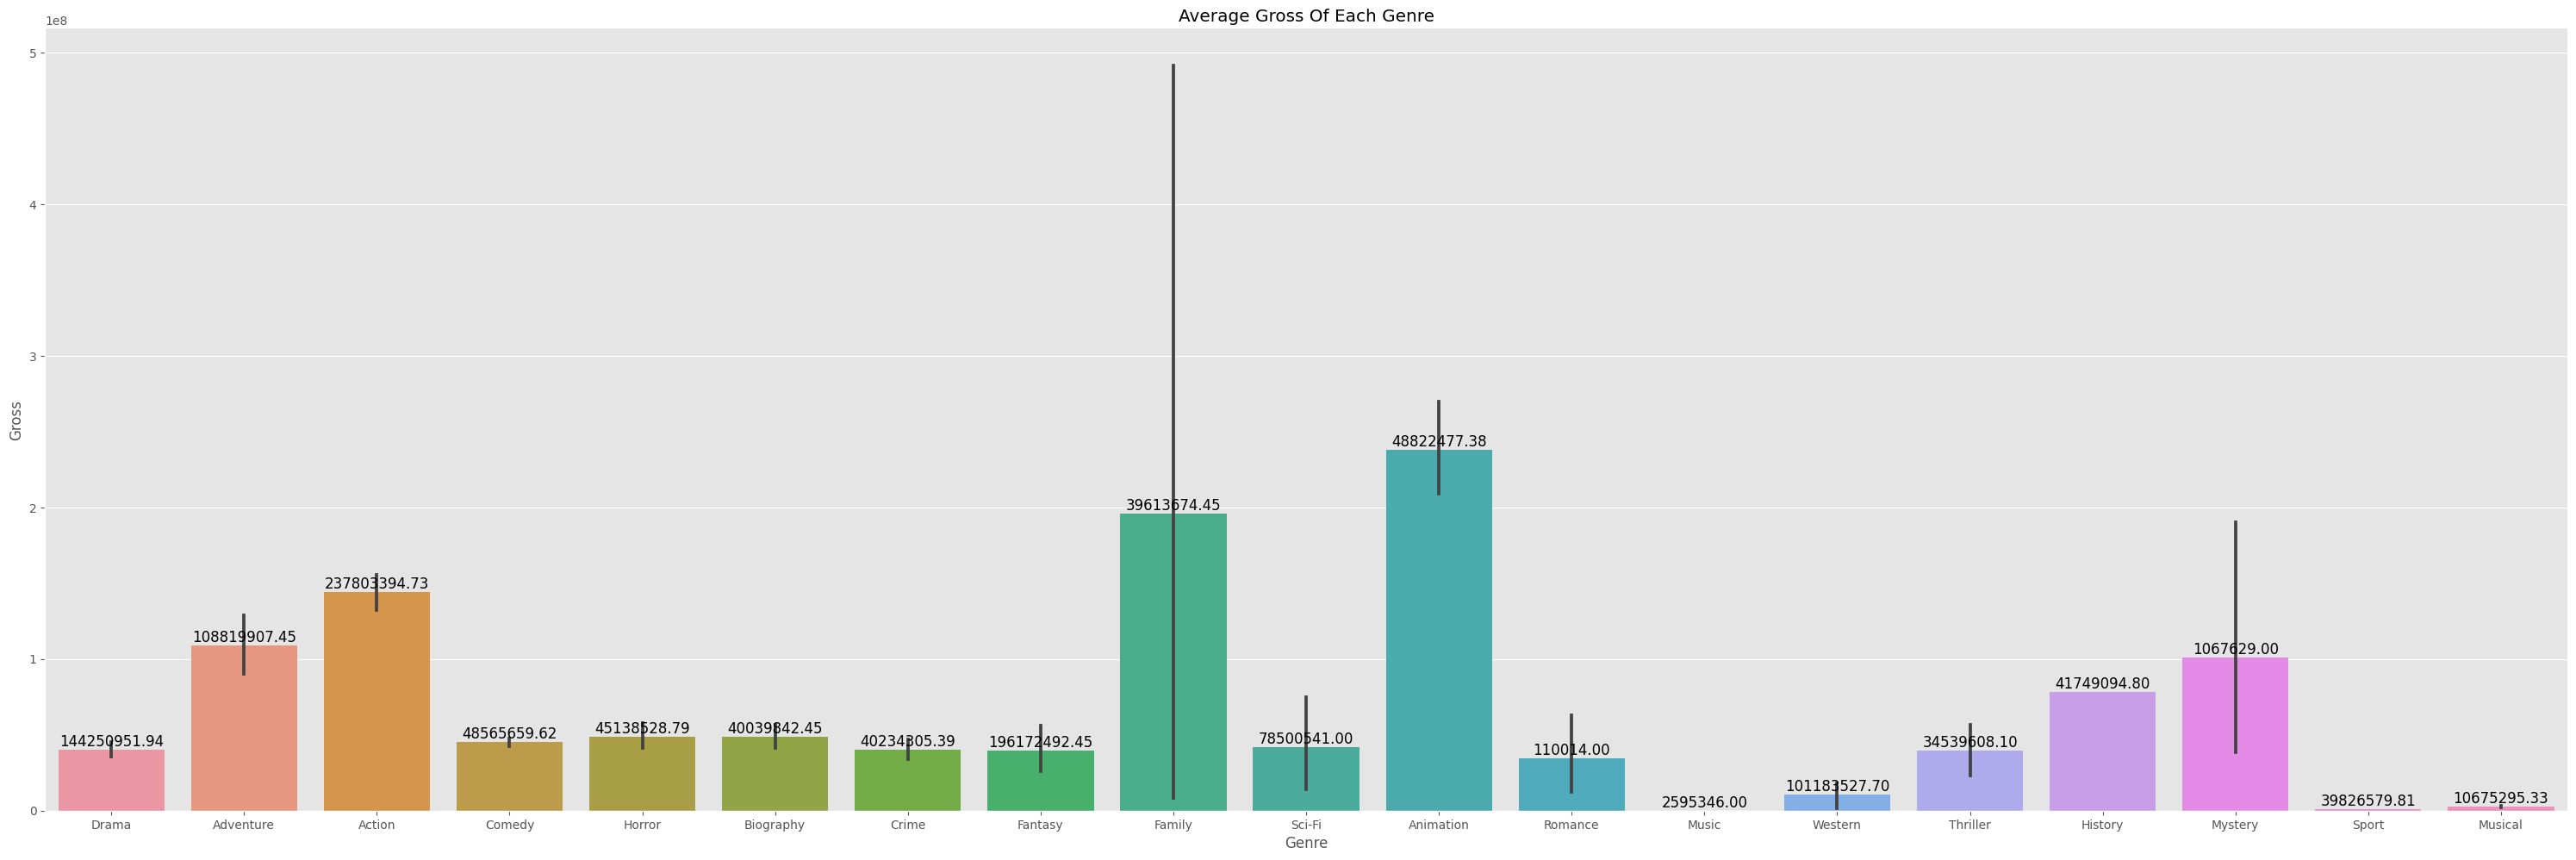

In [45]:
# Plot bar chart with average budget of each genre
ax = sns.catplot(x='genre', y='gross', kind='bar', data=dfc, height=10, aspect=3)
plt.xlabel('Genre')
plt.ylabel('Gross')
plt.title('Average Gross Of Each Genre')

# Add text labels to the bars
for i, bar in enumerate(ax.ax.patches):
    # Get the height of the bar
    height = bar.get_height()
    # Add text label above the bar with the budget value rounded to 2 decimal places
    ax.ax.text(bar.get_x() + bar.get_width() / 2, height + 0.5, f'{dfc.groupby("genre")["gross"].mean().iloc[i]:.2f}', ha='center', va='bottom', fontsize=12)

plt.show()


Insight:

1. Compare visualizations 3 and 4 of family genre is 4th in investment but top two in gross earnings. Its budget is around 42 million US dollars and gross revenue is 200 million US dollars (approximately). That means 5 times return on investment.

2. Here the gross earnings of animated movies is at the top. The average gross earnings of an animated movie is around 240 million US dollars.That means 4 times return on investment.

3. Compare between animation and family genre for gross earnings , family genre tops in gross earnings rate.

4. Animation, family, action and adventure movies are gaining more gross compare with other genres because these genres tend to draw a wide range of audiences. Animation, family and action movies have the potential to appeal to both children and adults, while adventure movies offer an exciting and thrilling experience. These genres have a wide range of topics and stories that audiences can relate to, which makes them more attractive to viewers. Additionally, animation, family and action movies typically feature well-known actors, which further draws in audiences.

**Ask:**
    
5. What is the total box office return of films released in the past 5 years?

Analysis:

In [46]:
data = dfc.groupby('year')['gross'].agg({'sum'}).sort_values(by='year',ascending = False)[1:6].reset_index().rename(columns={'sum':'total_box_office_returns'})

This code performs the following steps:

1. Group the dataframe dfc by the 'year' column and calculate the sum of the 'gross' column for each group using the agg function.
2. Select only the rows with the 5 highest 'year' values (i.e. the 5 most recent years) using the sort_values and head methods.
3. Reset the index of the resulting dataframe.
4. Rename the column containing the total box office returns as 'total_box_office_returns' using the rename method.
5. Assign the resulting dataframe to the variable data.

Text(0.5, 1.0, 'Total Box Office Return of Films Released in the Past 5 Years')

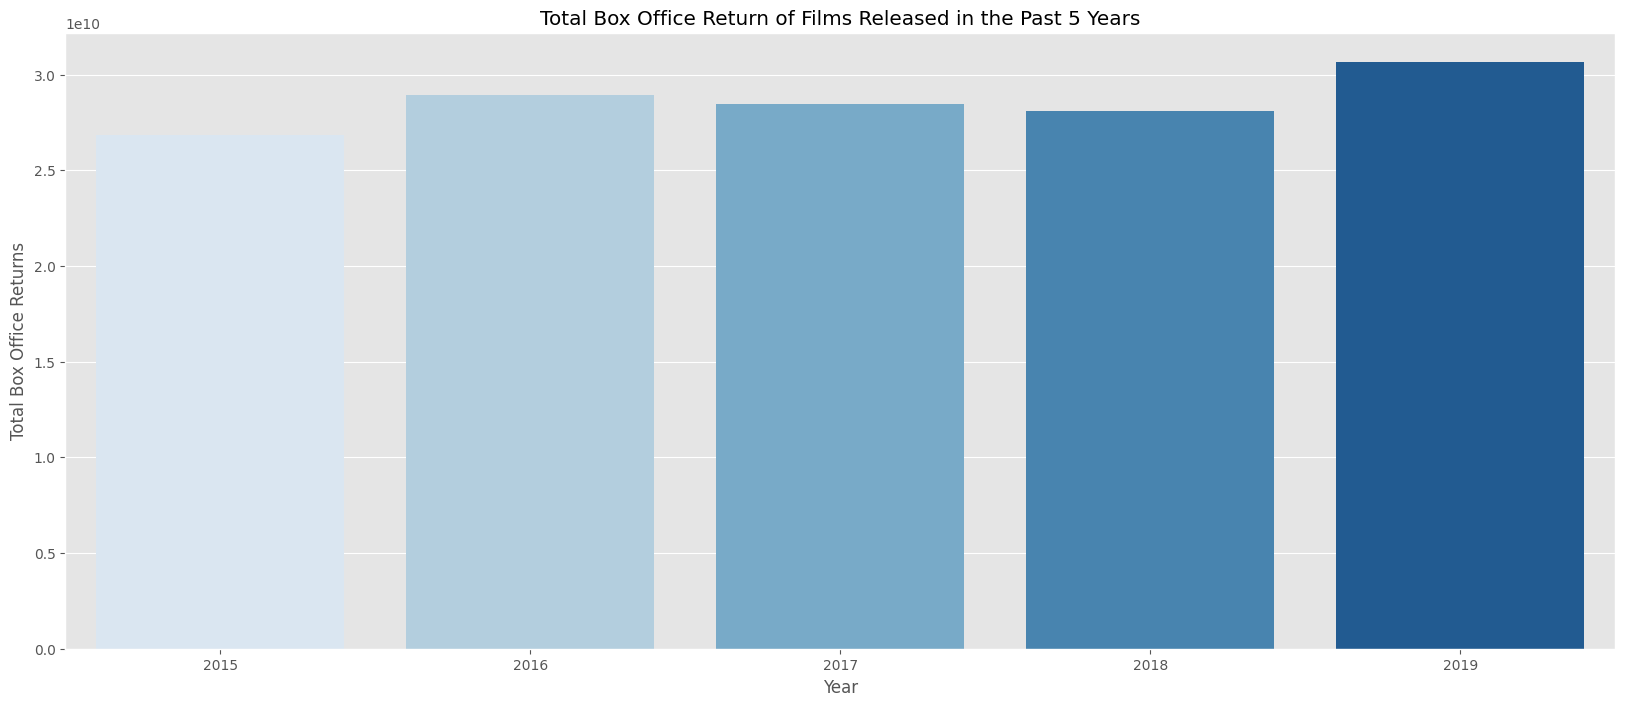

In [48]:
plt.figure(figsize=(20,8))
sns.barplot(x="year", y="total_box_office_returns", data=data, palette="Blues")
plt.xlabel('Year')
plt.ylabel('Total Box Office Returns')
plt.title("Total Box Office Return of Films Released in the Past 5 Years")


Insight:
- Note the bar graph of box-office returns from 2015 to 2019, showing a slight decrease between 2016 to 2018, while overall box office returns are steadily increasing.

**Ask:**

6. Total profits of past 10 years in movie industry?

Analysis:

In [49]:
# Profit Formula "Total_Sales-Total_Expenses".
dfc['profit'] = dfc['gross'] - dfc['budget']

In [50]:
dfc.head()

,name,rating,genre,year,released_date,released_place,score,votes,director,writer,star,country,budget,gross,company,runtime,profit
0,The Shining,R,Drama,1980,1980-06-13 00:00:00,United States,8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0,27998772.0
1,The Blue Lagoon,R,Adventure,1980,1980-07-02 00:00:00,United States,5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0,54353106.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,1980-06-20 00:00:00,United States,8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0,520375067.0
3,Airplane!,PG,Comedy,1980,1980-07-02 00:00:00,United States,7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0,79953539.0
4,Caddyshack,R,Comedy,1980,1980-07-25 00:00:00,United States,7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0,33846344.0


In [51]:
# Calculate total profit of each year
df_profit = dfc.groupby('year')['profit'].sum().reset_index().sort_values(by ='year',ascending=False).rename(columns={'profit':'total_profits'})[1:11]
df_profit

,year,total_profits
39,2019,2.100556e+10
38,2018,1.904369e+10
37,2017,1.869103e+10
36,2016,1.869316e+10
35,2015,1.796502e+10
34,2014,1.772036e+10
33,2013,1.650617e+10
32,2012,1.638207e+10
31,2011,1.562386e+10
30,2010,1.432961e+10


This code groups the movie data in the dataframe dfc by year and calculates the total profit for each year using the sum() function. The resulting dataframe df_profit contains the year and total profits for the top 10 years with the highest profits.

Here's a breakdown of the code:

- dfc.groupby('year'): group the data in dfc by year
- ['profit'].sum(): calculate the sum of the 'profit' column for each year
- .reset_index(): reset the index of the resulting dataframe
- .sort_values(by ='year',ascending=False): sort the dataframe by year in descending order
- .rename(columns={'profit':'total_profits'}): rename the 'profit' column to 'total_profits'
- [1:11]: select only the top 10 rows, excluding the first row which represents the current year.

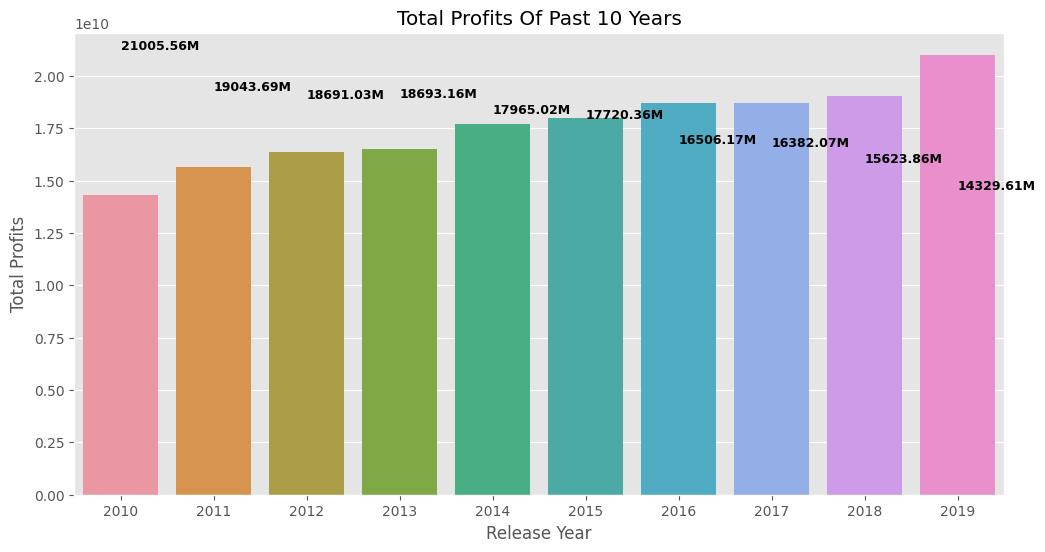

In [78]:
#  Total_profits of Past 10 Years. 
plt.figure(figsize=(12,6))
sns.barplot(x='year', y='total_profits', data=df_profit)
plt.xlabel('Release Year')
plt.ylabel('Total Profits')
plt.title('Total Profits Of Past 10 Years')

# Add text labels to the bars
for i, v in enumerate(df_profit['total_profits']):
    plt.text(i, v + df_profit['total_profits'].max() * 0.02, f"{v/1000000:.2f}M", va='center', fontsize=9, fontweight='bold', color='black')

plt.show()


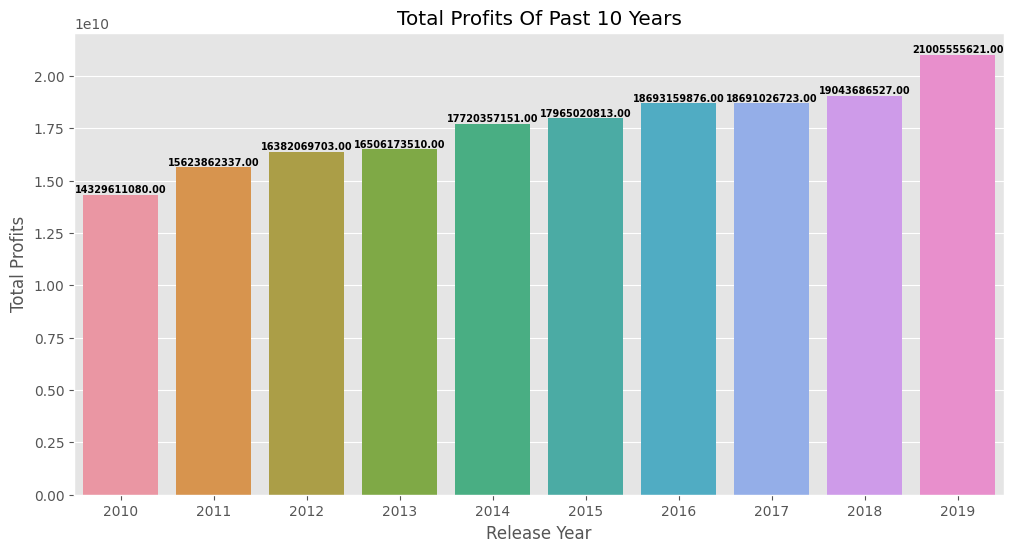

In [83]:
def add_value_labels(ax, spacing=5):
    """Add labels to the end of each bar in a bar chart.
    
    Arguments:
    ax -- The matplotlib object containing the axes of the plot to annotate.
    spacing -- The distance between the labels and the bars.
    """
    # For each bar: Place a label
    for rect in ax.patches:
        # Get the width and height of the rectangle
        width = rect.get_width()
        height = rect.get_height()

        # Determine the label position
        if height > 0:
            label_position = height + spacing
        else:
            label_position = height - spacing

        # Add the label
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + width / 2, label_position),
                    ha='center', va='bottom', fontsize=7, fontweight='bold')

# Create the plot
plt.figure(figsize=(12,6))
ax = sns.barplot(x='year', y='total_profits', data=df_profit)
plt.xlabel('Release Year')
plt.ylabel('Total Profits')
plt.title('Total Profits Of Past 10 Years')

# Add the value labels
add_value_labels(ax)

# Display the plot
plt.show()


This code defines a function add_value_labels that adds labels to the end of each bar in a bar chart. The function takes two arguments: ax, which is the matplotlib object containing the axes of the plot to annotate, and spacing, which is the distance between the labels and the bars (default value is 5).

In the function, the patches attribute of the ax object is iterated over, which returns a list of Rectangle objects for each bar in the plot. The width and height of each rectangle are then obtained using the get_width() and get_height() methods, respectively.

The label position is then determined based on the height of the bar and the value of the spacing argument. If the height is positive, the label is placed above the bar, otherwise it is placed below. Finally, the label is added to the plot using the annotate() method of the ax object, with the x-coordinate being the center of the bar, the y-coordinate being the determined label position, and the label text being the height of the bar formatted as a float with two decimal places.

After defining the function, a bar plot is created using seaborn's barplot() function, and the add_value_labels() function is called to add value labels to the bars. The resulting plot is then displayed using show() method of the pyplot module.

Insight:

The growth of the movie industry in the past 10 years can be attributed to a combination of factors. First, the emergence of streaming services such as Netflix, Amazon, and Hotstar have allowed for easier and more convenient access to content. This has resulted in a larger audience for movies, which has in turn allowed for increased profits. Additionally, the increasing popularity of 3D, IMAX technologies, new sound technologies (Dolby, etc) has brought new life to the movie-going experience, resulting in higher ticket prices and higher profits. Finally, the rise of the international market, particularly in Asia, has helped to boost revenues for the industry as a whole, as more people are exposed to movies in different countries around the world.

- these five factors have all contributed to the 50% growth of the movie industry in the past 10 years.
1. Innovative Storytelling:

Film studios are investing in more creative and innovative approaches to storytelling, which allows them to create more engaging storylines and characters.

2. Technological progress:

Movie studios have taken advantage of technological advances such as 3-D movies, digital effects and animation, and higher-resolution cameras, resulting in improved picture and sound quality.

3. Global Expansion:

Movie studios have expanded their reach into international markets, creating new revenue streams and ratings.

4. Add advertisements:

Movie studios spend a lot of money on advertising, which allows them to build intense hype and excitement around their films.

5. Streaming services:

Movie studios have embraced streaming services like Netflix and Amazon Prime to reach wider audiences and generate more profits.

**Ask:**

7. Top 10 movies have the highest viewership?

Analysis:

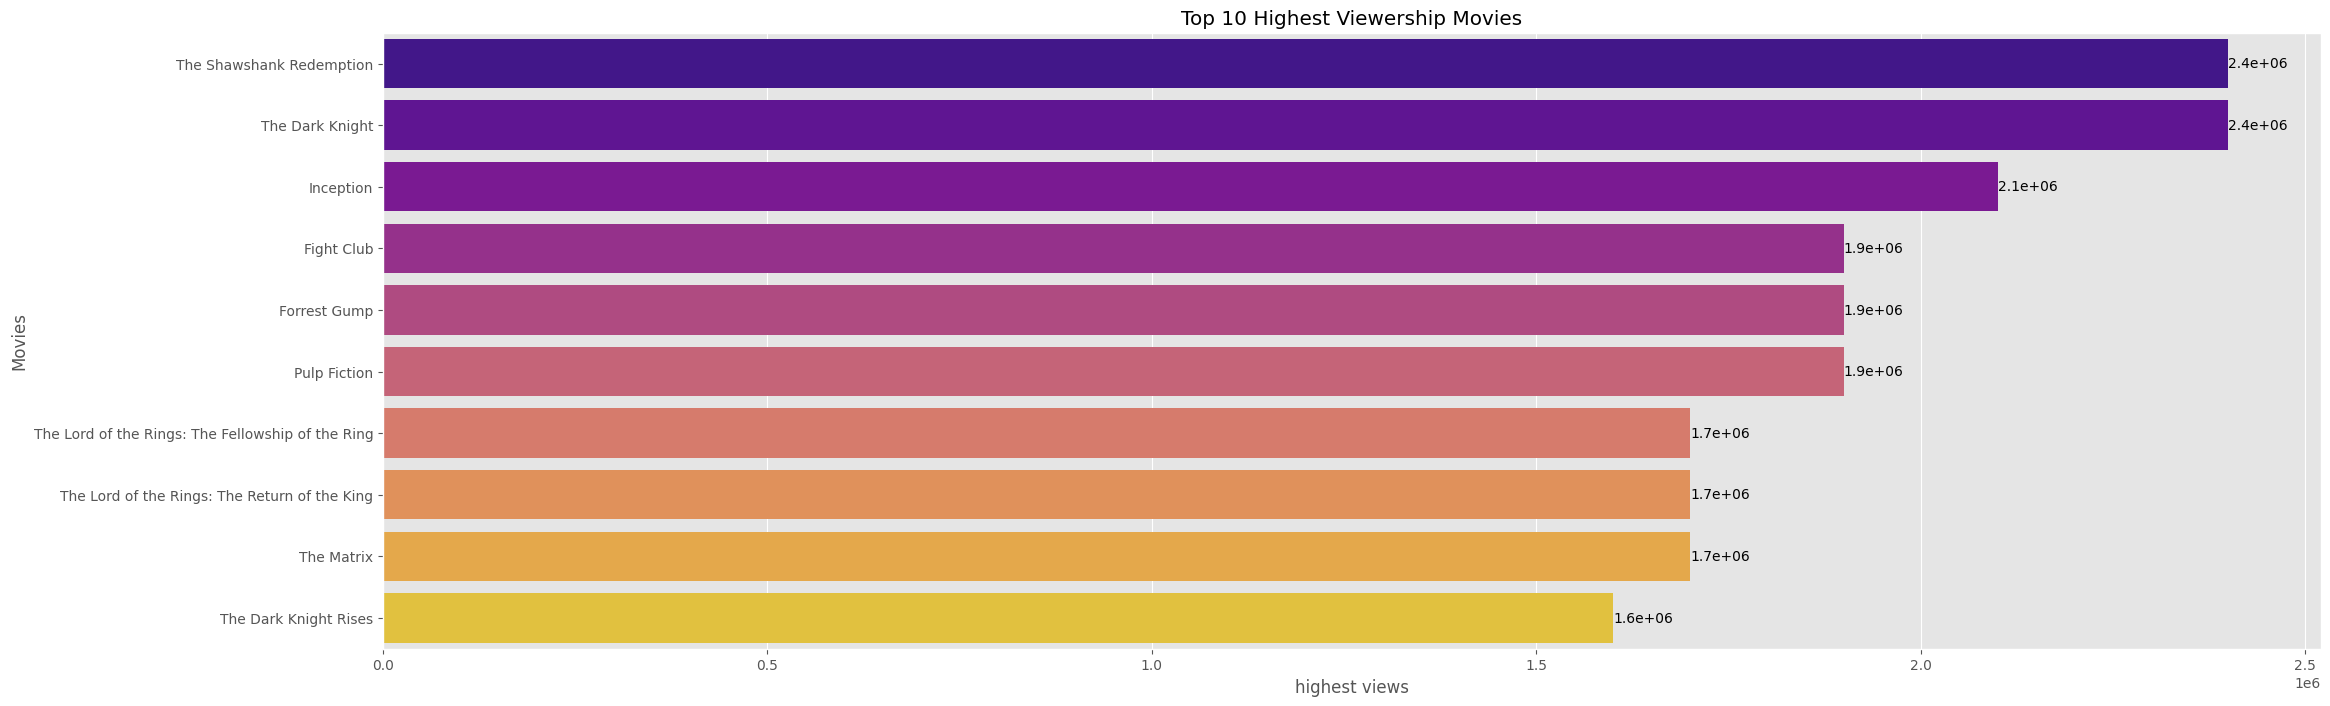

In [85]:
plt.figure(figsize=(25,8))
ax = sns.barplot(y='name', x='votes', data=dfc.sort_values(by='votes', ascending=False).head(10), palette='plasma')
plt.ylabel('Movies')
plt.xlabel('highest views')
plt.title('Top 10 Highest Viewership Movies')

# Add text labels to the bars
for i, bar in enumerate(ax.containers):
    # Get the vote count for the movie
    vote_count = dfc.sort_values(by='votes', ascending=False).head(10)['votes'].iloc[i]
    ax.bar_label(bar, label=f'{vote_count}', label_type='edge')


Insight:

1. The Shawshank Redemption and Dark Night are the biggest hits in the movie industry.

The Shawshank Redemption and The Dark Knight are two of the most beloved films in the film industry because they provide audiences with a uniquely immersive viewing experience. Shawshank Redemption is a drama about the life of a wrongly convicted prisoner and his journey to ultimate redemption. It stars Morgan Freeman and Tim Robbins and is based on a Stephen King novel. The Dark Knight is a superhero action film that tells the story of Batman and his mission to protect Gotham City from the Joker and other villains. Directed by Christopher Nolan and starring Christian Bale, Heath Ledger and Aaron Eckhart, the film was a smash hit and won two Oscars. Both films have received critical acclaim for their stellar performances, compelling storylines, and unique visuals. They have become cult films and set the standard for future films in their respective genres.

2. Top 5 movies with the highest viewership dominated by films made before 2000, except for 2 films made in 2008 (the dark knight) and 2010 (Inception). 

**Ask:**

8. Who is the most successful movie director?

Analysis:

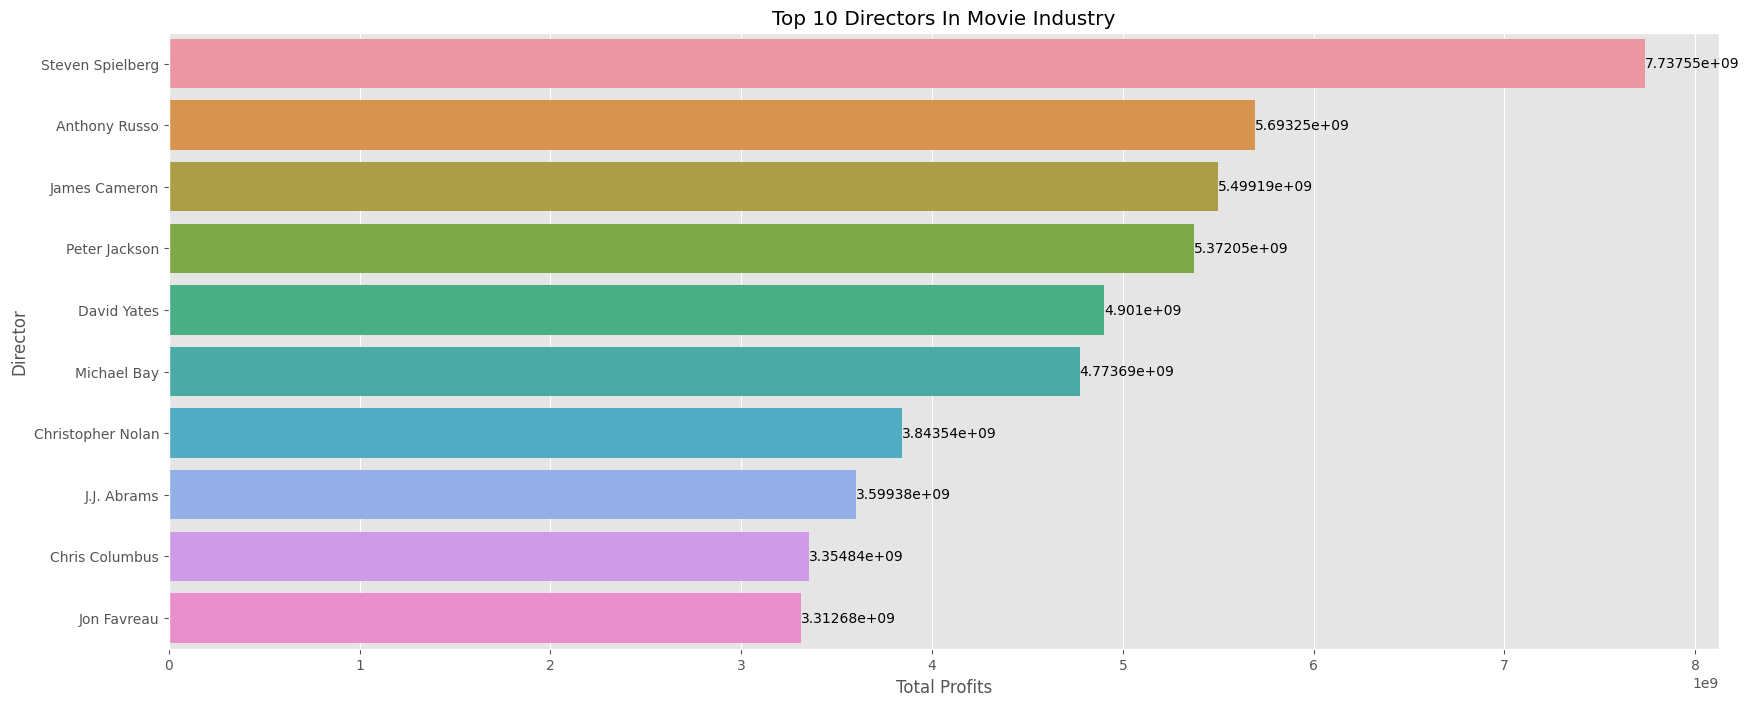

In [86]:
data = dfc.groupby('director')['profit'].sum().reset_index().rename(columns={'profit':'total_profit'}).sort_values(by='total_profit',ascending=False)[:10]
plt.figure(figsize=(20,8))
ax = sns.barplot(y='director',x='total_profit',data=data)
plt.ylabel('Director')
plt.xlabel('Total Profits')
plt.title('Top 10 Directors In Movie Industry')

# Add text labels to the bars
for i, bar in enumerate(ax.containers):
    # Get the total profit for the director
    total_profit = data['total_profit'].iloc[i]
    ax.bar_label(bar, label=f'{total_profit:.2f}M', label_type='edge')


Insight:

Steven Spielberg is the highest-grossing director in the film industry because he is the highest-grossing director in the film industry. He made an estimated $7.8 billion in profits in the film industry.

**Ask:**

9. What types of movies have the highest viewership?

Analysis:

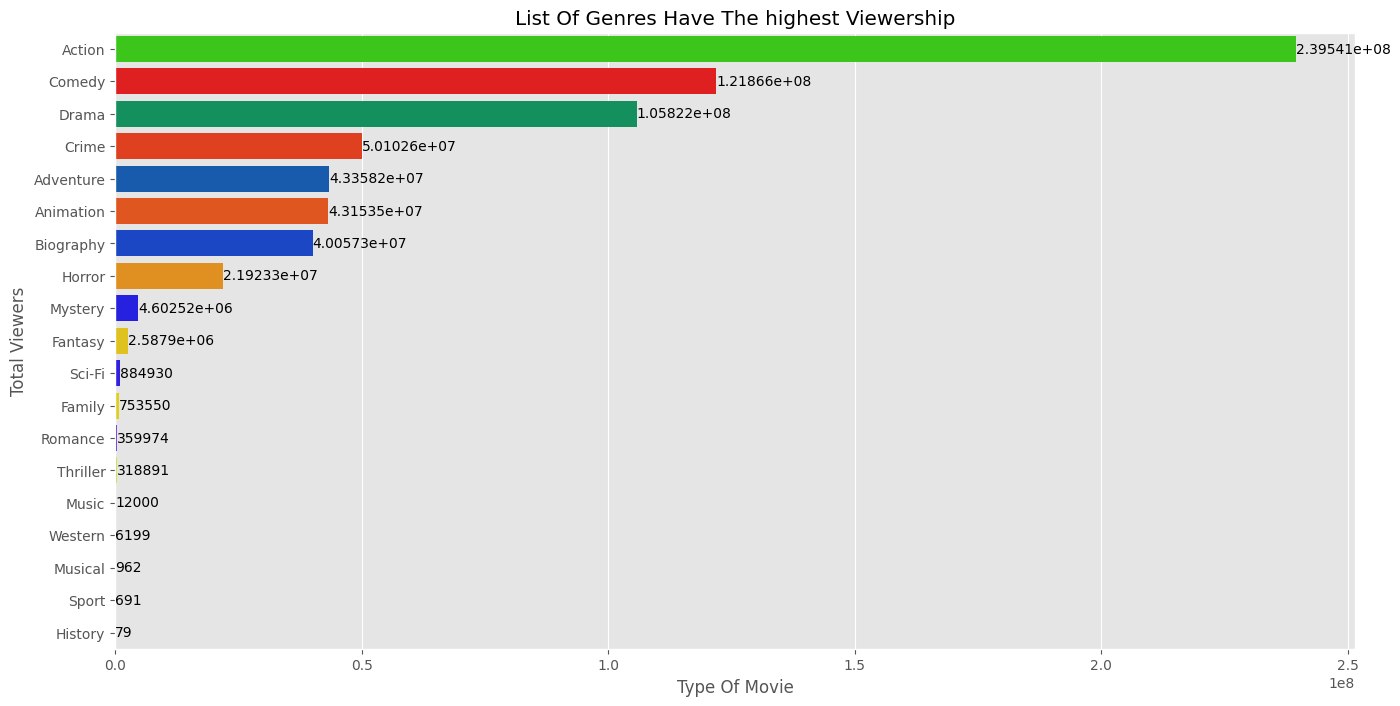

In [87]:
data = dfc.groupby('genre')['votes'].agg({'sum'}).reset_index().rename(columns={'sum':'total_views'})
data = data.sort_values(by='total_views', ascending=False)
plt.figure(figsize=(16,8))
ax = sns.barplot(x='total_views', y='genre', data=data, palette='prism')
plt.xlabel('Type Of Movie')
plt.ylabel('Total Viewers')
plt.title('List Of Genres Have The highest Viewership')

# Add text labels to the bars
for i, bar in enumerate(ax.containers):
    # Get the total views for the genre
    total_views = data['total_views'].iloc[i]
    ax.bar_label(bar, label=f'{total_views}', label_type='edge')


Insight:

Action, comedy, and drama are some of the most popular genres in the film industry because they provide exciting, entertaining, and engaging experiences for audiences. Action movies give viewers adrenaline rush and thrills, while comedies bring laughs and a sense of escapism to viewers. Drama films offer audiences a deeper, more meaningful experience, allowing them to connect with characters and stories in a more personal way. The combination of these three genres creates an all-encompassing experience that is as entertaining as it is thought-provoking, making them one of the most beloved genres in the film industry.

**Ask:**

10. What is the average movie rating?

Analysis:

<Figure size 1600x800 with 0 Axes>

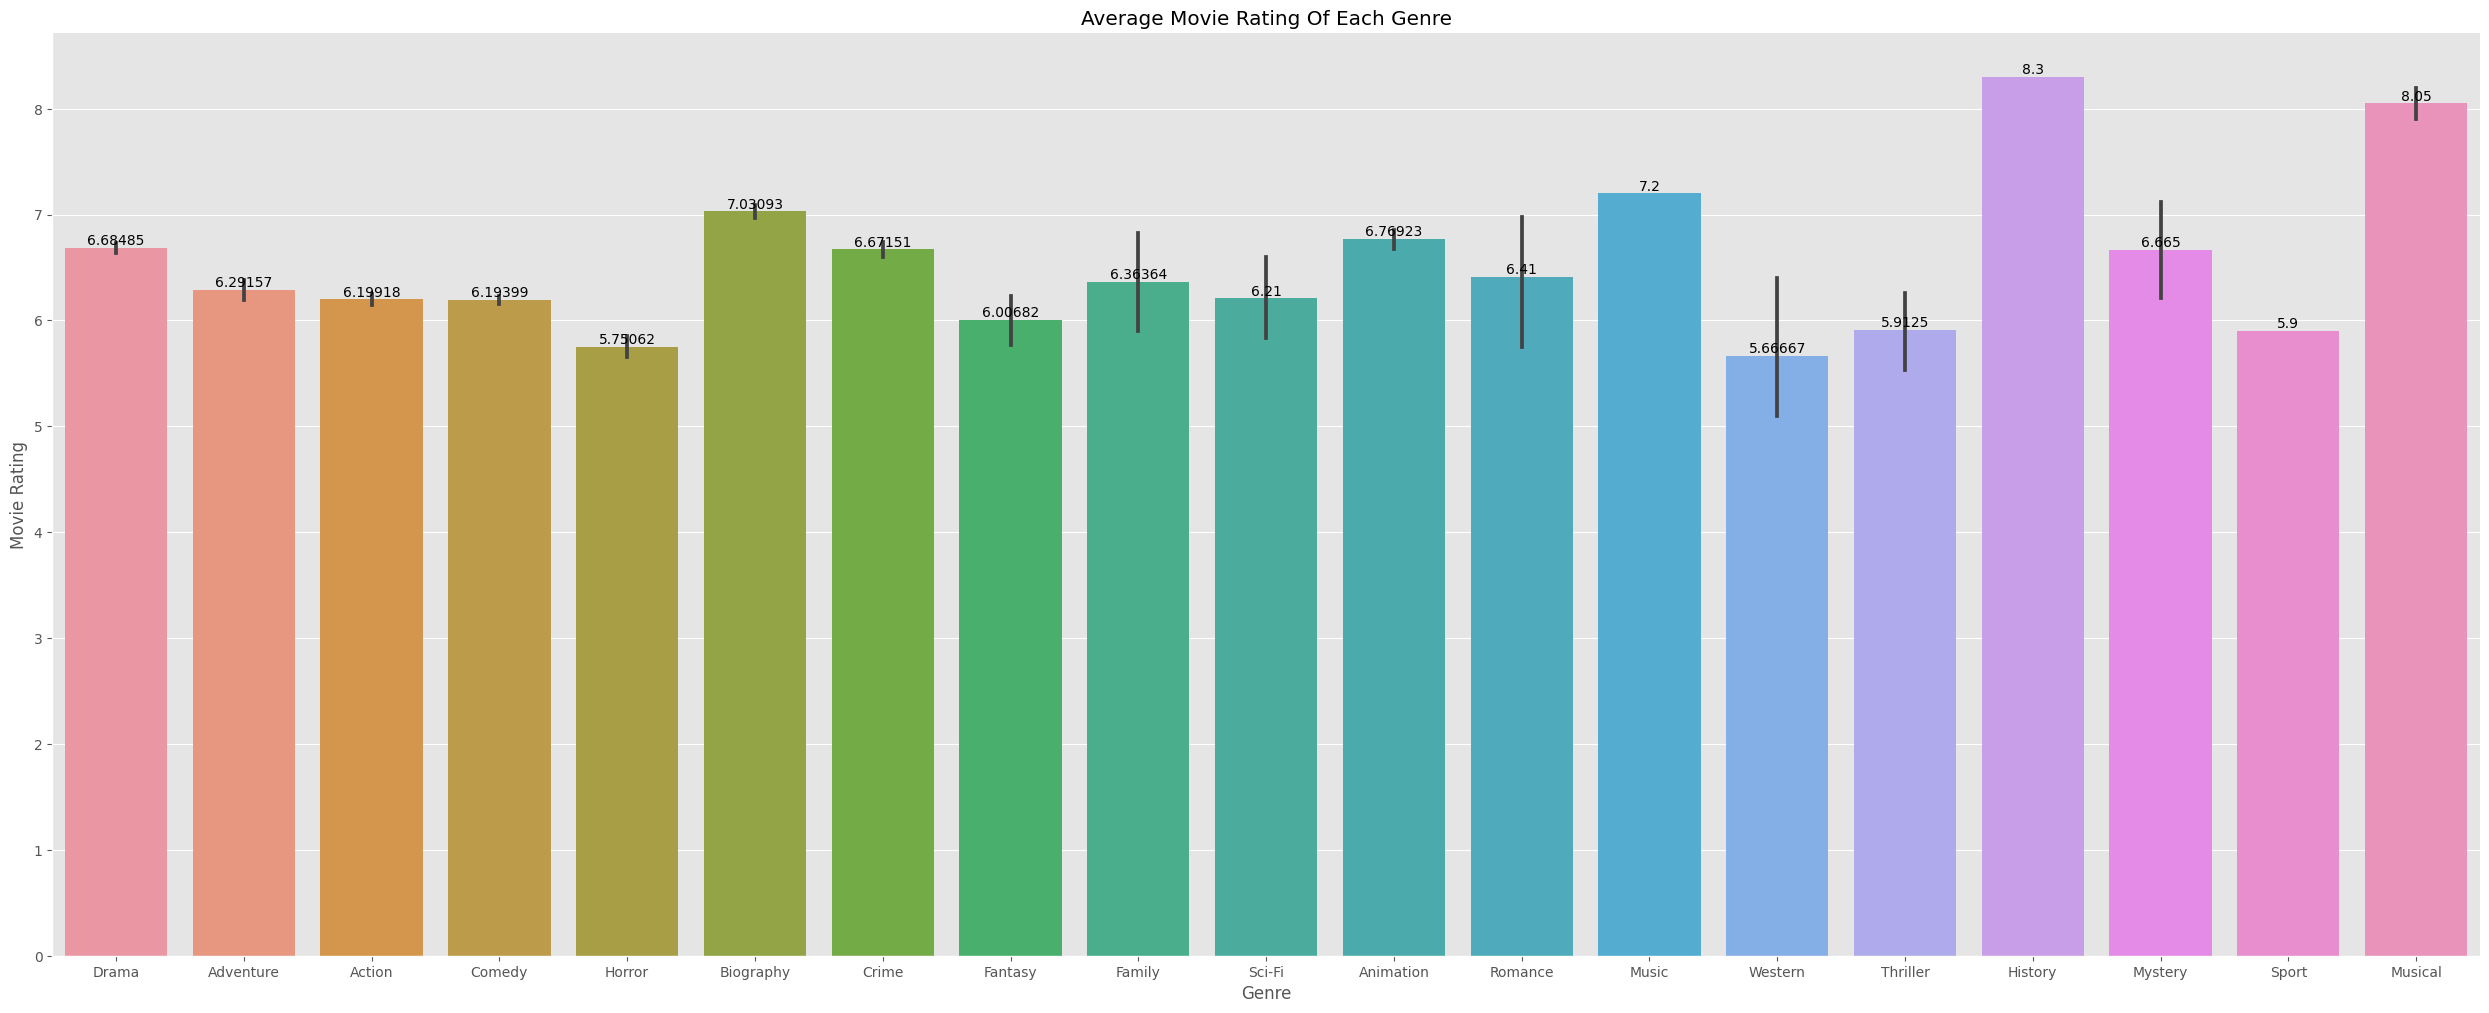

In [92]:
plt.figure(figsize=(16,8))
ax = sns.catplot(x='genre', y='score', kind='bar', data=dfc, height=10, aspect=2.5)
plt.xlabel('Genre')
plt.ylabel('Movie Rating')
plt.title('Average Movie Rating Of Each Genre')

# Add text labels to the bars
for i, bar in enumerate(ax.ax.containers):
    # Get the average movie rating for the genre
    avg_rating = dfc.groupby('genre')['score'].mean()[i]
    ax.ax.bar_label(bar, label=f'{avg_rating:.2f}', label_type='edge')


Insight:

Due to their propensity to be well-liked, entertaining, and frequently having a broad appeal, the historical and musical genres consistently receive some of the top ratings. History and music both have the power to unite people through the sharing of stories from various cultures and historical periods. People can also study about history and get understanding of other cultures and historical events. People can bond over a shared experience through music and find solace from the stresses of daily life. In addition, history and music frequently possess a timeless character that can contribute to their enduring appeal.

*Ask:*

11. Which countries produce the most films?

Analysis:

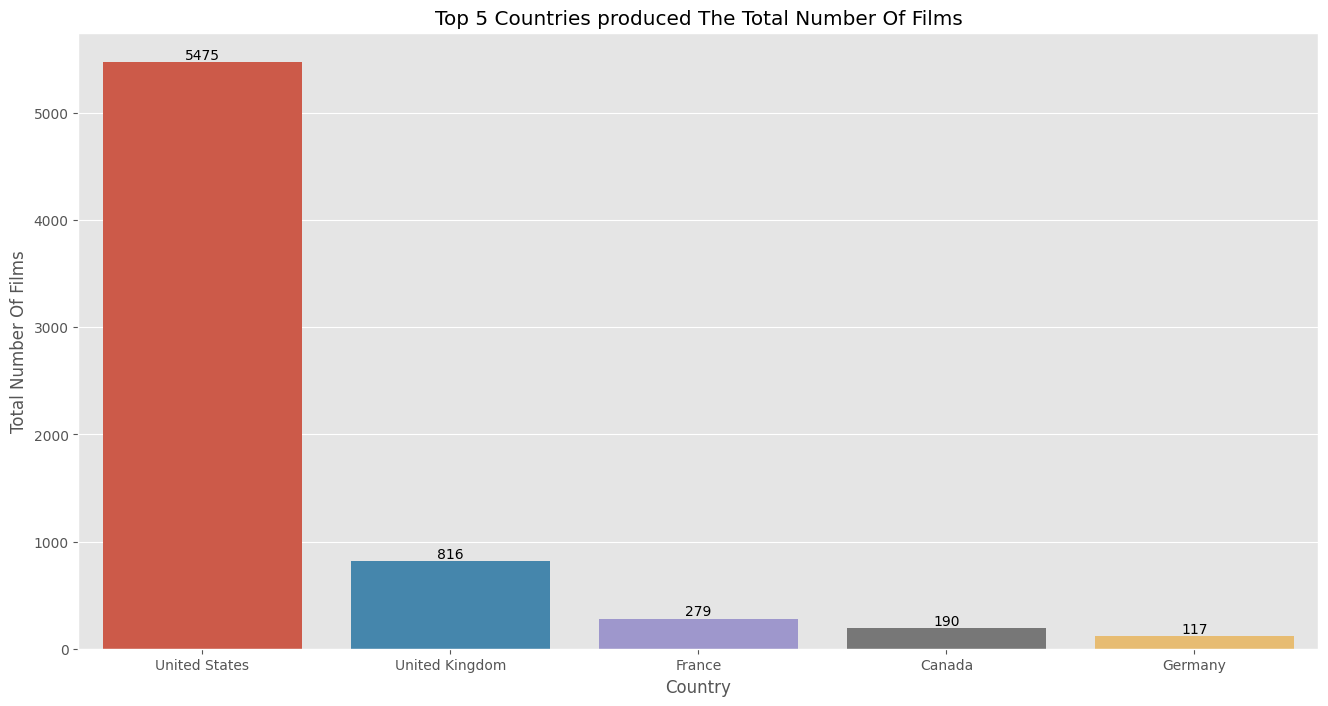

In [93]:
data = dfc.groupby('country')['name'].agg({'count'}).reset_index().rename(columns={'count':'total_number_of_films'}).sort_values(by='total_number_of_films',ascending = False)[:5]

plt.figure(figsize=(16,8))
ax = sns.barplot(x='country', y='total_number_of_films', data=data)

plt.xlabel('Country')
plt.ylabel('Total Number Of Films')
plt.title('Top 5 Countries produced The Total Number Of Films')

# Add labels to each bar
for i, bar in enumerate(ax.patches):
    ax.text(bar.get_x() + bar.get_width() / 2, 
            bar.get_height() + 1, 
            data.iloc[i]['total_number_of_films'], 
            ha='center', va='bottom')
    
plt.show()

Insight:

With more than twice as many films produced as any other nation, the United States is the world's top film producer. The greatest film business in the world and one of the most sophisticated film marketplaces are to blame for a large portion of this. Filmmaking in the United States has a long and successful history, and the nation has produced several well-known movies. The renowned Hollywood film business is also based there. Also, the United States has access to the most cutting-edge infrastructure and technology in the world, enabling effective film production and post-production.

*Ask:*

12. What is the total and avg gross collection of movies based on rating?

Analysis:

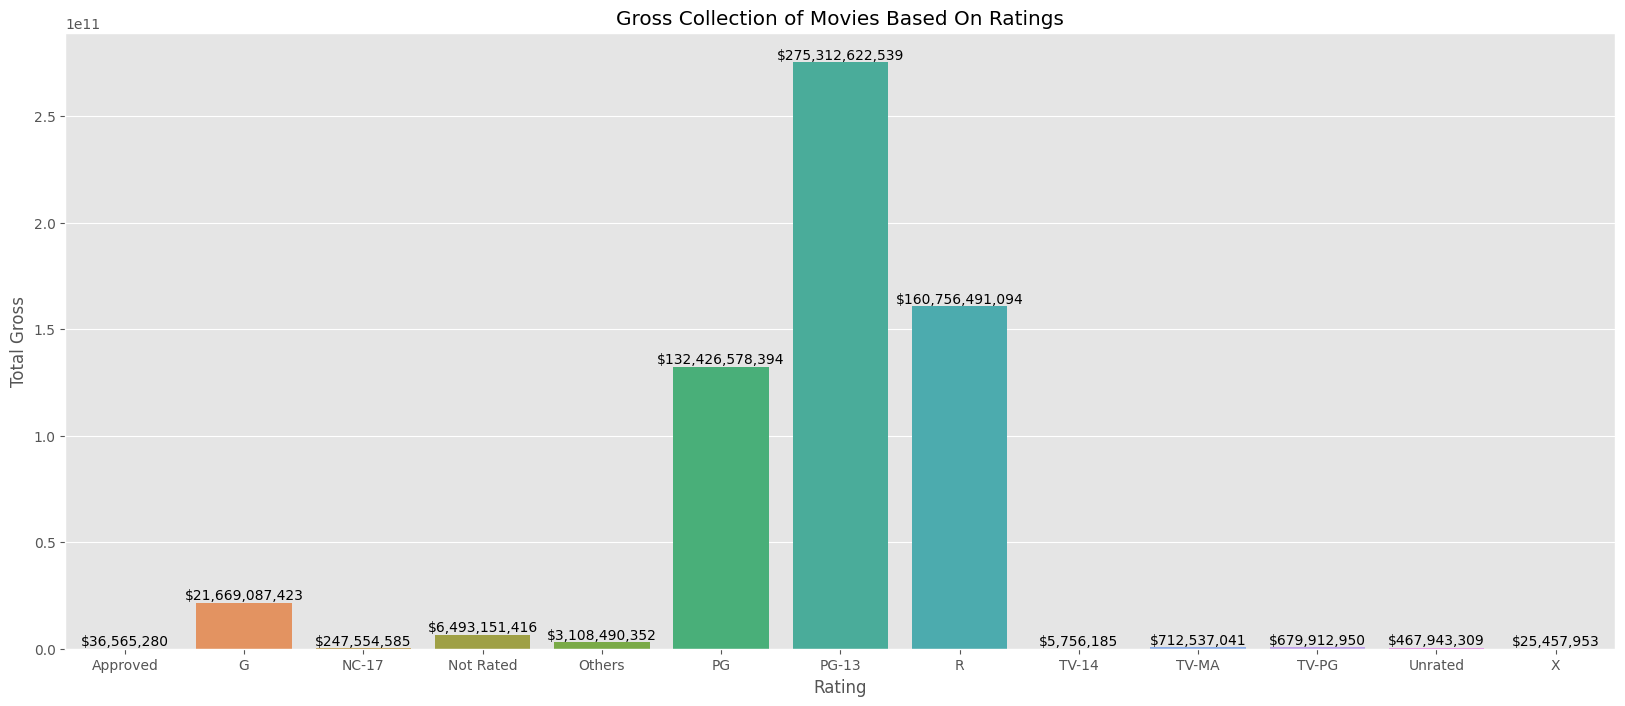

In [99]:
data = dfc.groupby('rating')['gross'].sum().reset_index().rename(columns={'gross':'total_gross'})
plt.figure(figsize=(20,8))
ax = sns.barplot(x='rating', y='total_gross', data=data)

plt.xlabel('Rating')
plt.ylabel('Total Gross')
plt.title('Gross Collection of Movies Based On Ratings')

# Add labels to each bar
for i, bar in enumerate(ax.patches):
    ax.text(bar.get_x() + bar.get_width() / 2, 
            bar.get_height() + 1, 
            '${:,.0f}'.format(data.iloc[i]['total_gross']), 
            ha='center', va='bottom')
    
plt.show()

Insight:
    
1. With around 280 billion US dollars in revenue, parental guidance for kids under 13 (PG-13) has the greatest gross. 

2. In terms of gross revenue, R (about 160 billion) and PG (about 130 billion) ratings came in second and third, respectively.

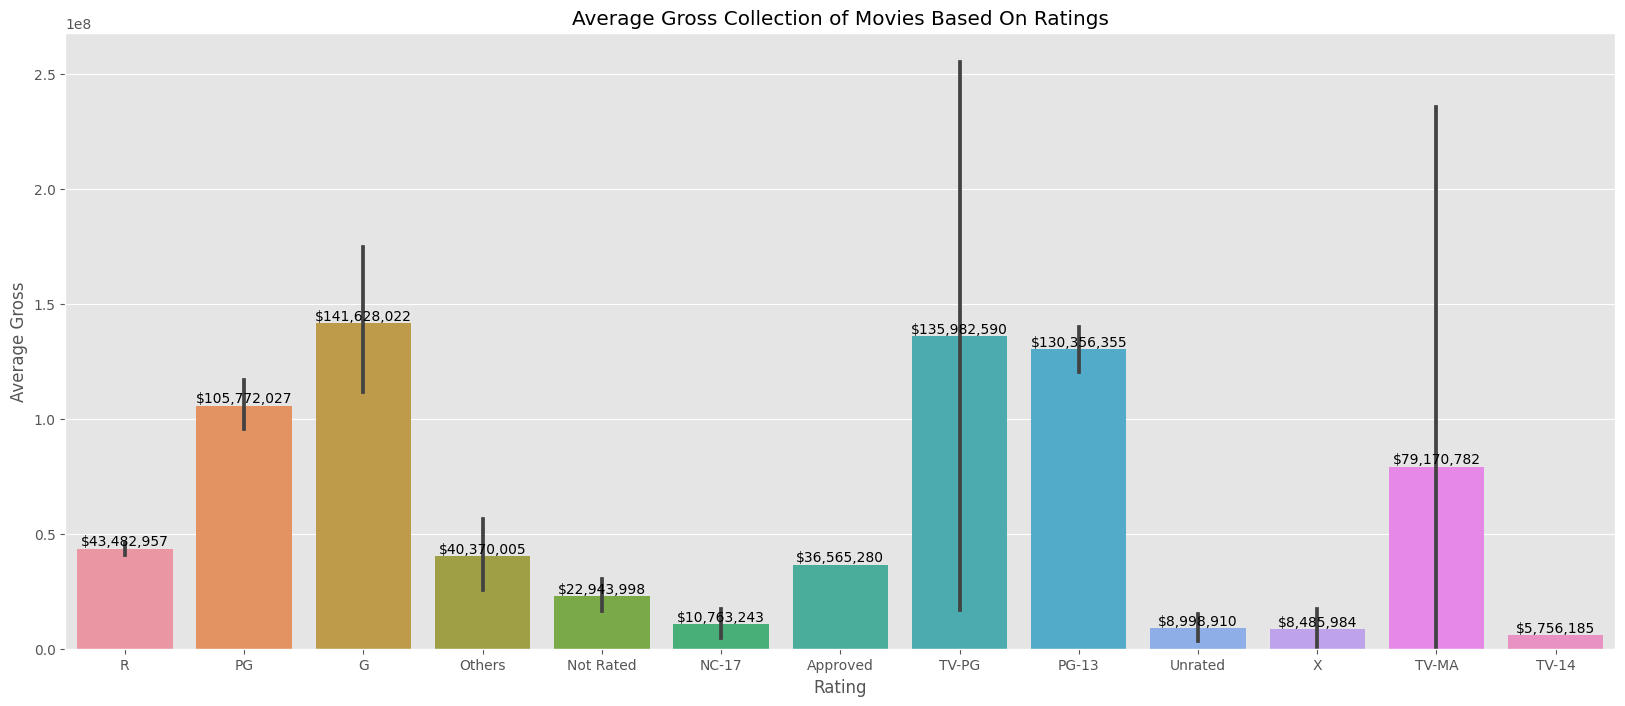

In [100]:
# Average Gross Collections Of Movies Based On Ratings. 
plt.figure(figsize=(20,8))
ax = sns.barplot(x='rating', y='gross', data=dfc)

plt.xlabel('Rating')
plt.ylabel('Average Gross')
plt.title('Average Gross Collection of Movies Based On Ratings')

# Add labels to each bar
for i, bar in enumerate(ax.patches):
    ax.text(bar.get_x() + bar.get_width() / 2, 
            bar.get_height() + 1, 
            '${:,.0f}'.format(bar.get_height()), 
            ha='center', va='bottom')
    
plt.show()

Insight:

1. Appropriate For People Of All Ages(G) and Television Under Parental Guidelines (TV-PG) and finally followed by parental guidance for kids under 13 (PG-13) are top listed in average gross collections.

**Ask:**

13. What are the most successful companies in movie industry?

Analysis:

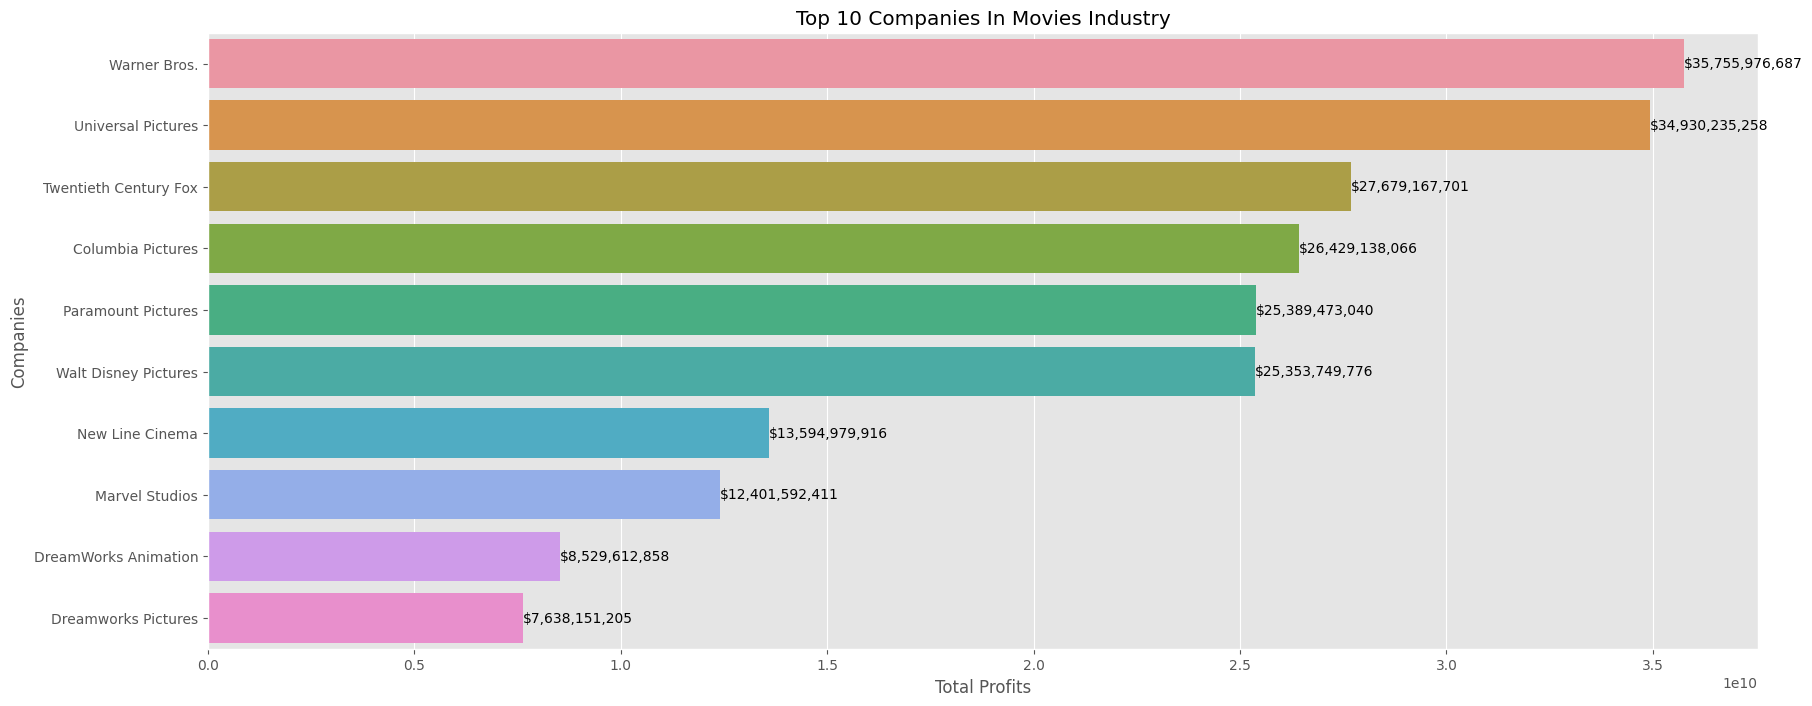

In [101]:
data = dfc.groupby(['company'])['profit'].agg({'sum'}).reset_index().rename(columns={'sum':'total_profit'}).sort_values('total_profit',ascending =False)[:10]
plt.figure(figsize=(20,8))
ax = sns.barplot(y='company', x='total_profit', data=data)

plt.ylabel('Companies')
plt.xlabel('Total Profits')
plt.title('Top 10 Companies In Movies Industry')

# Add labels to each bar
for i, bar in enumerate(ax.patches):
    ax.text(bar.get_width() + 1, 
            bar.get_y() + bar.get_height() / 2, 
            '${:,.0f}'.format(data.iloc[i]['total_profit']), 
            ha='left', va='center')
    
plt.show()

Insight:

For many years, Warner Brothers has been among the most prosperous businesses in the film industry. They have regularly created some of the most enduring and popular movies ever. Several of the most adored brands, including Harry Potter, DC Comics, and The Lord of the Rings, are represented in their filmography. By adjusting to emerging technologies like streaming services and digital distribution, Warner Brothers has also been able to keep one step ahead of the competition. Warner Brothers is also well renowned for their dedication to diversity and inclusion in their movies, which has assisted them in staying relevant and drawing audiences from all backgrounds.

## Correlation

### Budget Vs Gross Earnings

In [20]:
# Sort values
df.sort_values(by=['gross'], inplace=True, ascending=False)

In [22]:
pd.set_option('display.max_rows',None)

pd.set_option('display.max_rows', None) is a command in pandas that sets the maximum number of rows to display when you output a DataFrame to the console or Jupyter notebook.

Setting it to None means that there is no limit to the number of rows that will be displayed. This can be useful if you have a large DataFrame and you want to see all the rows.

By default, pandas only displays the first 5 and last 5 rows of a DataFrame if it has more than 10 rows. If you set display.max_rows to None, it will show all the rows.

Keep in mind that if you have a very large DataFrame, displaying all the rows may take up a lot of space and make it difficult to navigate the output. So it's often better to use other methods to explore and analyze large datasets, such as selecting a subset of the data, grouping the data, or plotting it.

In [24]:
# Budget high correlation
# Company high correlation

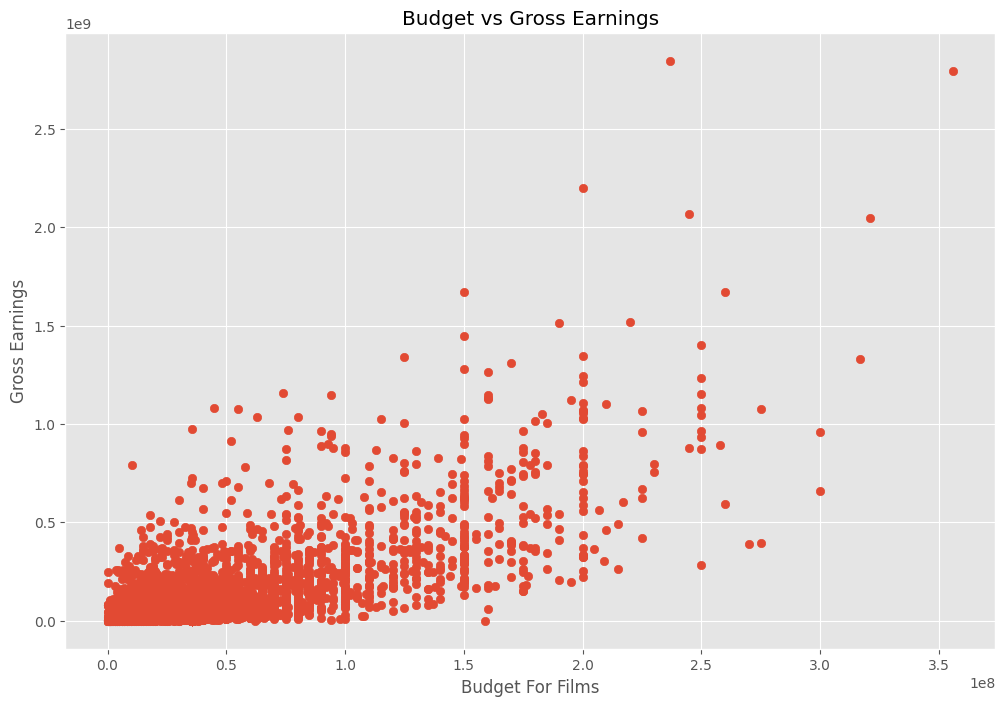

In [102]:
# Scatter plot with budget vs gross using matplotlib

plt.scatter(x=dfc['budget'], y=dfc['gross']) # make a scatter plot from columns that we want

plt.title('Budget vs Gross Earnings') # add title to scatter plot

plt.xlabel('Budget For Films') # add name for x label
plt.ylabel('Gross Earnings') # add name for y label


plt.show()

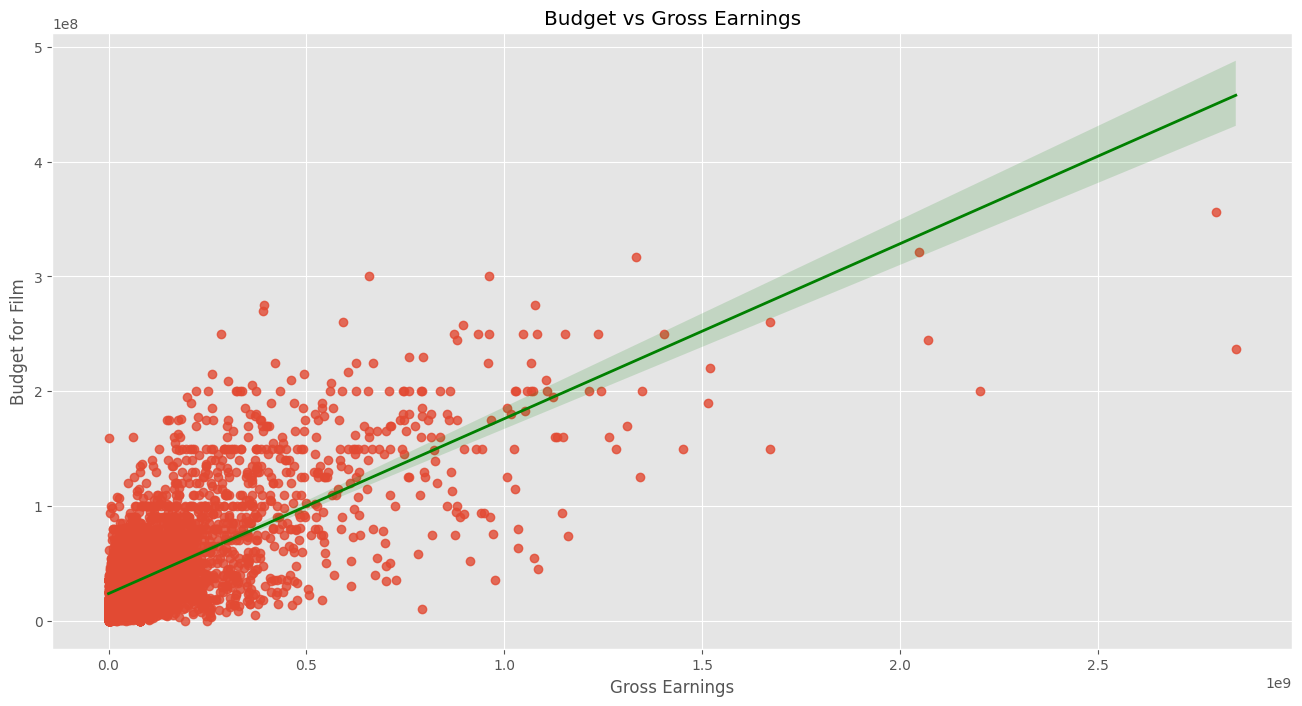

In [103]:
# Scatter plot with budget vs gross using matplotlib

plt.figure(figsize=(16,8))
sns.regplot(x="gross", y="budget", data=dfc,line_kws={'lw':2,'color':'green'})
plt.title('Budget vs Gross Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('Budget for Film')
plt.show()

<Axes: xlabel='budget', ylabel='gross'>

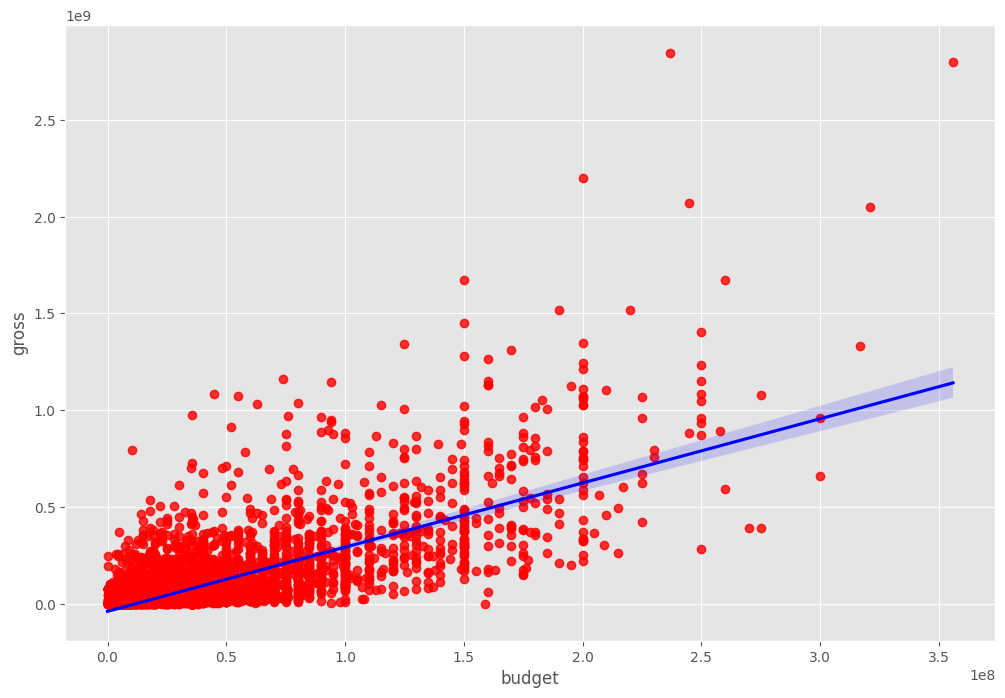

In [73]:
# Plot budget vs gross using seaborn

sns.regplot(x='budget', y='gross', data=dfc, scatter_kws={"color": "red"}, line_kws= {"color":"blue"})

Insight:

Look at the scatter plot, the cluster is positively related to budget and gross. The huge budget means that the quality of the film, screenplay and graphics will increase. And it attracts more audience to the theater and automatically makes the gross earnings skyrocket.

### Correlation Between All Columns

In [27]:
# Looking at correlations

In [104]:
dfc.corr(method='pearson') #pearson (by default), kendall, spearman

,year,score,votes,budget,gross,runtime,profit
year,1.000000,0.092616,0.222427,0.265578,0.252042,0.116358,0.226643
score,0.092616,1.000000,0.407101,0.066569,0.181331,0.394564,0.194077
votes,0.222427,0.407101,1.000000,0.421195,0.628677,0.306984,0.625430
budget,0.265578,0.066569,0.421195,1.000000,0.711270,0.263673,0.577175
gross,0.252042,0.181331,0.628677,0.711270,1.000000,0.239449,0.984545
runtime,0.116358,0.394564,0.306984,0.263673,0.239449,1.000000,0.212488
profit,0.226643,0.194077,0.625430,0.577175,0.984545,0.212488,1.000000


In [29]:
# high correlation between budget and gross

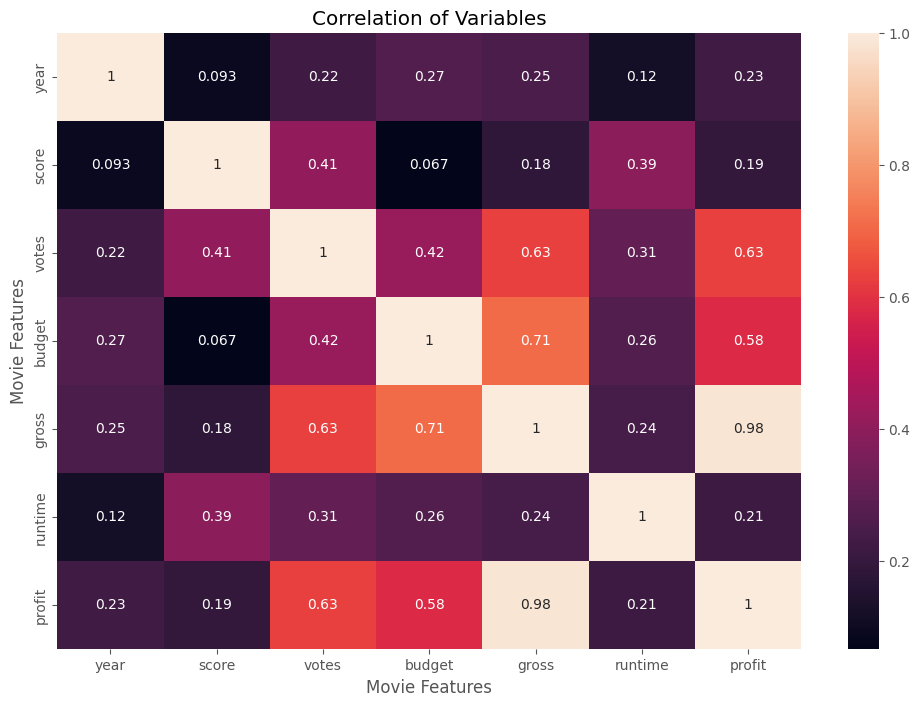

In [105]:
correlation_matrix = dfc.corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation of Variables') # add title to scatter plot

plt.xlabel('Movie Features') # add name for x label
plt.ylabel('Movie Features') # add name for y label

plt.show()

## Columns with data type object are also converted to category data type to be included in the correlation

In [106]:
df_numerized = dfc.copy()

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
df_numerized

,name,rating,genre,year,released_date,released_place,score,votes,director,writer,star,country,budget,gross,company,runtime,profit
0,6587,7,6,1980,16,57,8.4,927000.0,2589,4015,1047,55,19000000.0,46998772.0,2320,146.0,27998772.0
1,5573,7,1,1980,20,57,5.8,65000.0,2269,1632,327,56,4500000.0,58853106.0,731,104.0,54353106.0
2,5142,5,0,1980,17,57,8.7,1200000.0,1111,2567,1745,56,18000000.0,538375067.0,1540,124.0,520375067.0
3,286,5,4,1980,20,57,7.7,221000.0,1301,2000,2247,56,3500000.0,83453539.0,1813,88.0,79953539.0
4,1027,7,4,1980,24,57,7.3,108000.0,1054,521,410,56,6000000.0,39846344.0,1777,98.0,33846344.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,3705,4,6,2020,2939,57,3.1,18.0,1500,2289,2422,56,7000.0,78500541.0,1780,90.0,78493541.0
7664,1678,4,4,2020,2922,57,4.7,36.0,774,2614,1886,56,35589876.0,78500541.0,539,90.0,42910665.0
7665,4717,4,6,2020,2929,8,5.7,29.0,2061,2683,2040,56,58750.0,78500541.0,941,0.0,78441791.0
7666,2843,4,6,2020,2938,57,0.0,0.0,1184,1824,450,56,15000.0,78500541.0,1780,120.0,78485541.0


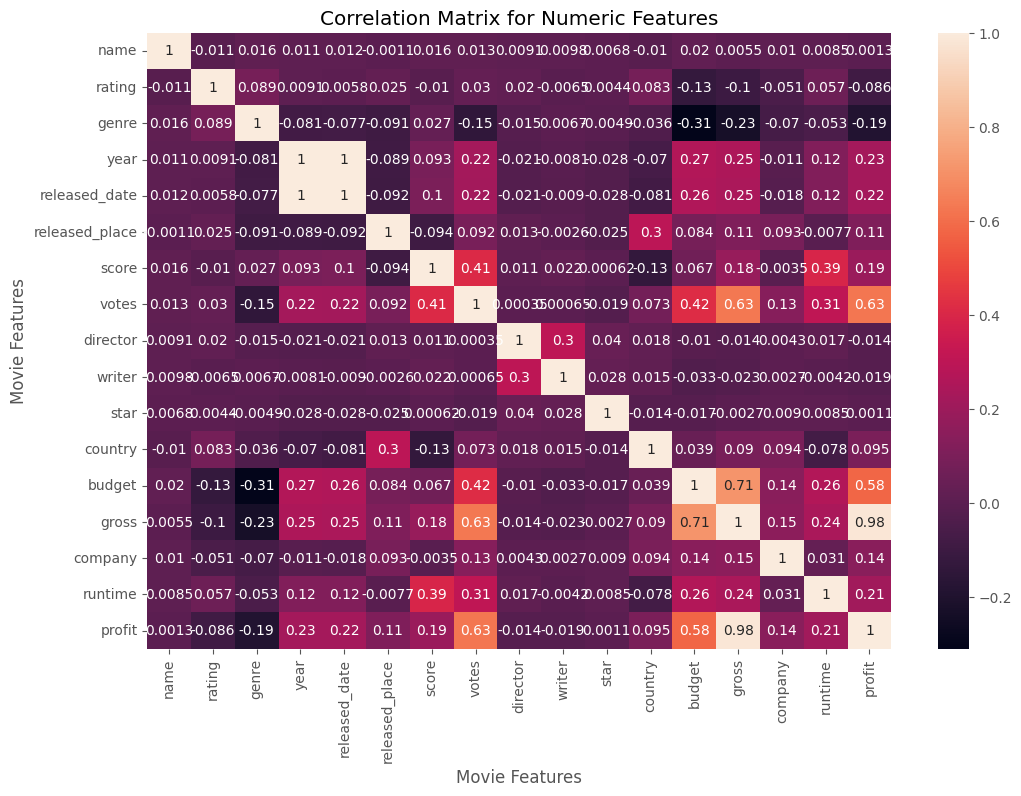

In [107]:
correlation_matrix = df_numerized.corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matrix for Numeric Features') # add title to scatter plot

plt.xlabel('Movie Features') # add name for x label
plt.ylabel('Movie Features') # add name for y label

plt.show()

Text(0.5, 1.0, 'Correlation Of The Columns')

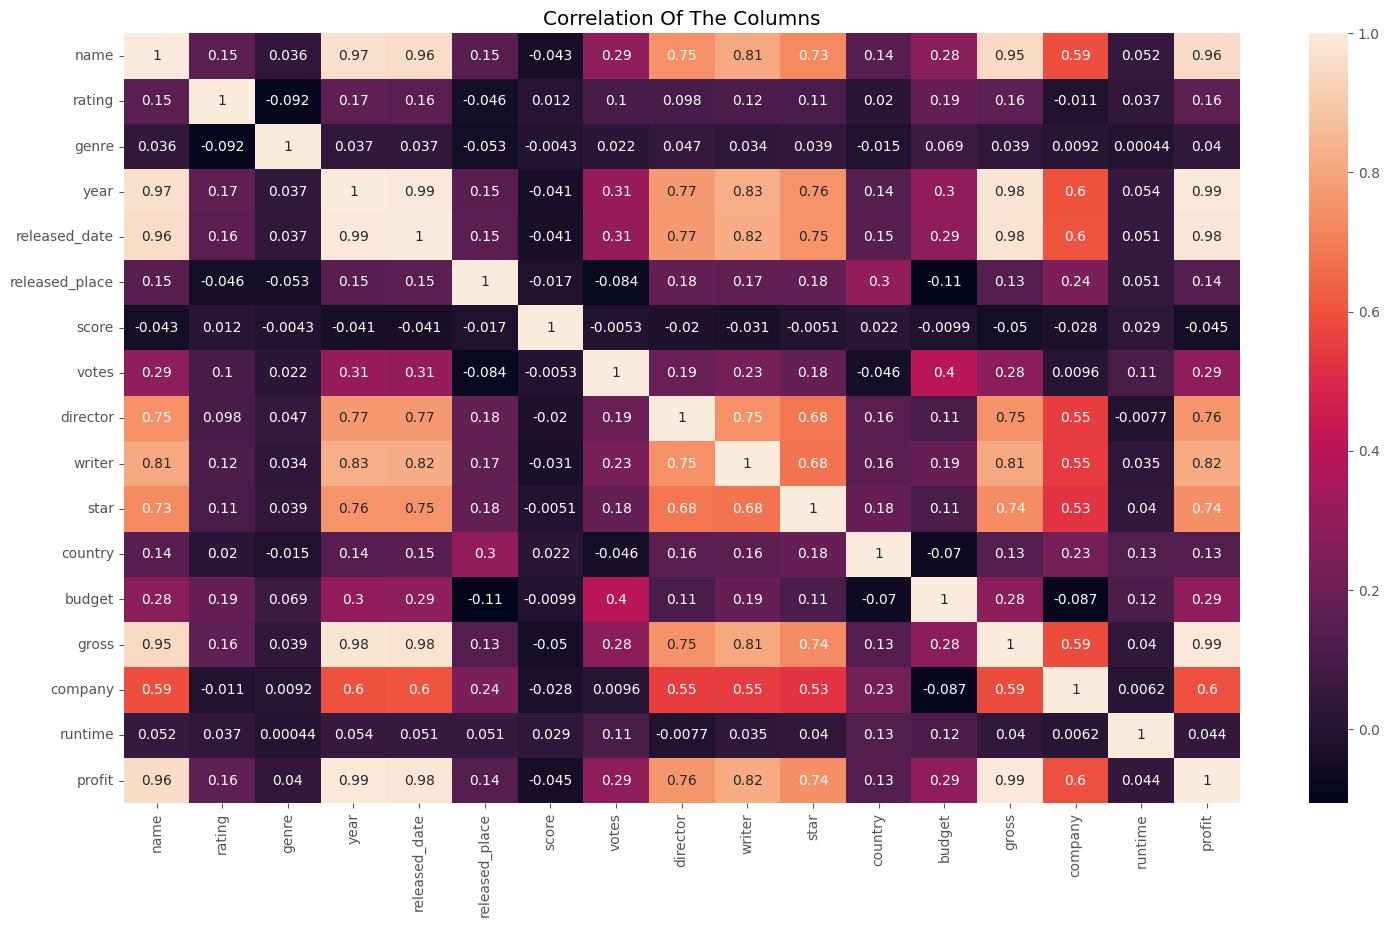

In [78]:
# Second way
# Using factorize - this assigns a random numeric value for each unique categorical value

plt.figure(figsize=(18,10))
sns.heatmap(dfc.apply(lambda x: x.factorize()[0]).corr(method='pearson'),annot=True)
plt.title('Correlation Of The Columns')

Insight:

1. A film's gross earnings increase as its budget does if there is a positive correlation between the two variables in the film business. This implies that movies with higher budgets stand a better chance of turning a bigger profit. 

2. In the movie business, there is a positive link between budget and votes, which indicates that films with larger budgets typically receive more votes. This might be due to the fact that films with higher budgets typically have more marketing resources available to them, better production values, and better actors and directors, all of which contribute to a film's overall quality and increase the likelihood that audiences will enjoy it and give it more votes.

3. In the movie business, there is a strong positive link between director and gross, which implies that the more successful the director, the more money the movie will make. The renown of the filmmaker, the caliber of their work, and the amount of star power they draw to a project are a few reasons why this might be the case. Success of a director frequently predicts the success of the movie they are directing.

4. A star hero's presence in a movie is likely to increase box office receipts because there is a strong positive association between star hero and profit in the movie business. This is so because popular characters are more likely to have a significant fan following who watch their movies. The name of the lead character might be utilized to promote the picture and draw in more viewers.

In [108]:
df_numerized.corr()

,name,rating,genre,year,released_date,released_place,score,votes,director,writer,star,country,budget,gross,company,runtime,profit
name,1.000000,-0.011090,0.016355,0.011453,0.011685,-0.001062,0.016377,0.013038,0.009079,0.009758,0.006754,-0.010468,0.020368,0.005466,0.010139,0.008483,0.001276
rating,-0.011090,1.000000,0.088535,0.009119,0.005750,0.025176,-0.010067,0.029943,0.020238,-0.006486,0.004431,0.082703,-0.131074,-0.102508,-0.051490,0.057060,-0.086432
genre,0.016355,0.088535,1.000000,-0.081261,-0.077156,-0.091177,0.027384,-0.145296,-0.015258,0.006702,-0.004850,-0.036374,-0.310566,-0.230267,-0.070398,-0.052914,-0.190137
year,0.011453,0.009119,-0.081261,1.000000,0.997016,-0.088712,0.092616,0.222427,-0.020795,-0.008121,-0.027761,-0.069930,0.265578,0.252042,-0.011224,0.116358,0.226643
released_date,0.011685,0.005750,-0.077156,0.997016,1.000000,-0.091839,0.101479,0.217611,-0.021319,-0.009025,-0.027823,-0.080902,0.260108,0.247275,-0.017582,0.117428,0.222468
released_place,-0.001062,0.025176,-0.091177,-0.088712,-0.091839,1.000000,-0.093858,0.092254,0.013287,-0.002554,-0.024881,0.295408,0.083873,0.113049,0.093288,-0.007693,0.110439
score,0.016377,-0.010067,0.027384,0.092616,0.101479,-0.093858,1.000000,0.407101,0.010568,0.022387,0.000617,-0.134542,0.066569,0.181331,-0.003536,0.394564,0.194077
votes,0.013038,0.029943,-0.145296,0.222427,0.217611,0.092254,0.407101,1.000000,0.000349,0.000654,-0.019322,0.073461,0.421195,0.628677,0.131432,0.306984,0.625430
director,0.009079,0.020238,-0.015258,-0.020795,-0.021319,0.013287,0.010568,0.000349,1.000000,0.299524,0.039725,0.017610,-0.010364,-0.014272,0.004292,0.017062,-0.013998
writer,0.009758,-0.006486,0.006702,-0.008121,-0.009025,-0.002554,0.022387,0.000654,0.299524,1.000000,0.028485,0.014674,-0.033233,-0.023207,0.002675,-0.004166,-0.018681


In [109]:
correlation_mat = df_numerized.corr()

corr_pairs = correlation_mat.unstack()

corr_pairs

name    name             1.000000
        rating          -0.011090
        genre            0.016355
        year             0.011453
        released_date    0.011685
                           ...   
profit  budget           0.577175
        gross            0.984545
        company          0.140661
        runtime          0.212488
        profit           1.000000
Length: 289, dtype: float64

In [110]:
sorted_pairs = corr_pairs.sort_values()

sorted_pairs

genre    budget    -0.310566
budget   genre     -0.310566
genre    gross     -0.230267
gross    genre     -0.230267
profit   genre     -0.190137
                      ...   
year     year       1.000000
genre    genre      1.000000
rating   rating     1.000000
runtime  runtime    1.000000
profit   profit     1.000000
Length: 289, dtype: float64

In [111]:
# displaying pairs that have correlation greater than 0.5
high_corr = sorted_pairs[(sorted_pairs) > 0.5]

high_corr

profit          budget            0.577175
budget          profit            0.577175
votes           profit            0.625430
profit          votes             0.625430
gross           votes             0.628677
votes           gross             0.628677
gross           budget            0.711270
budget          gross             0.711270
profit          gross             0.984545
gross           profit            0.984545
released_date   year              0.997016
year            released_date     0.997016
name            name              1.000000
director        director          1.000000
company         company           1.000000
gross           gross             1.000000
budget          budget            1.000000
country         country           1.000000
star            star              1.000000
writer          writer            1.000000
votes           votes             1.000000
score           score             1.000000
released_place  released_place    1.000000
released_da

Result :Votes and Budget Have the Highest Correlation to Gross Earnings

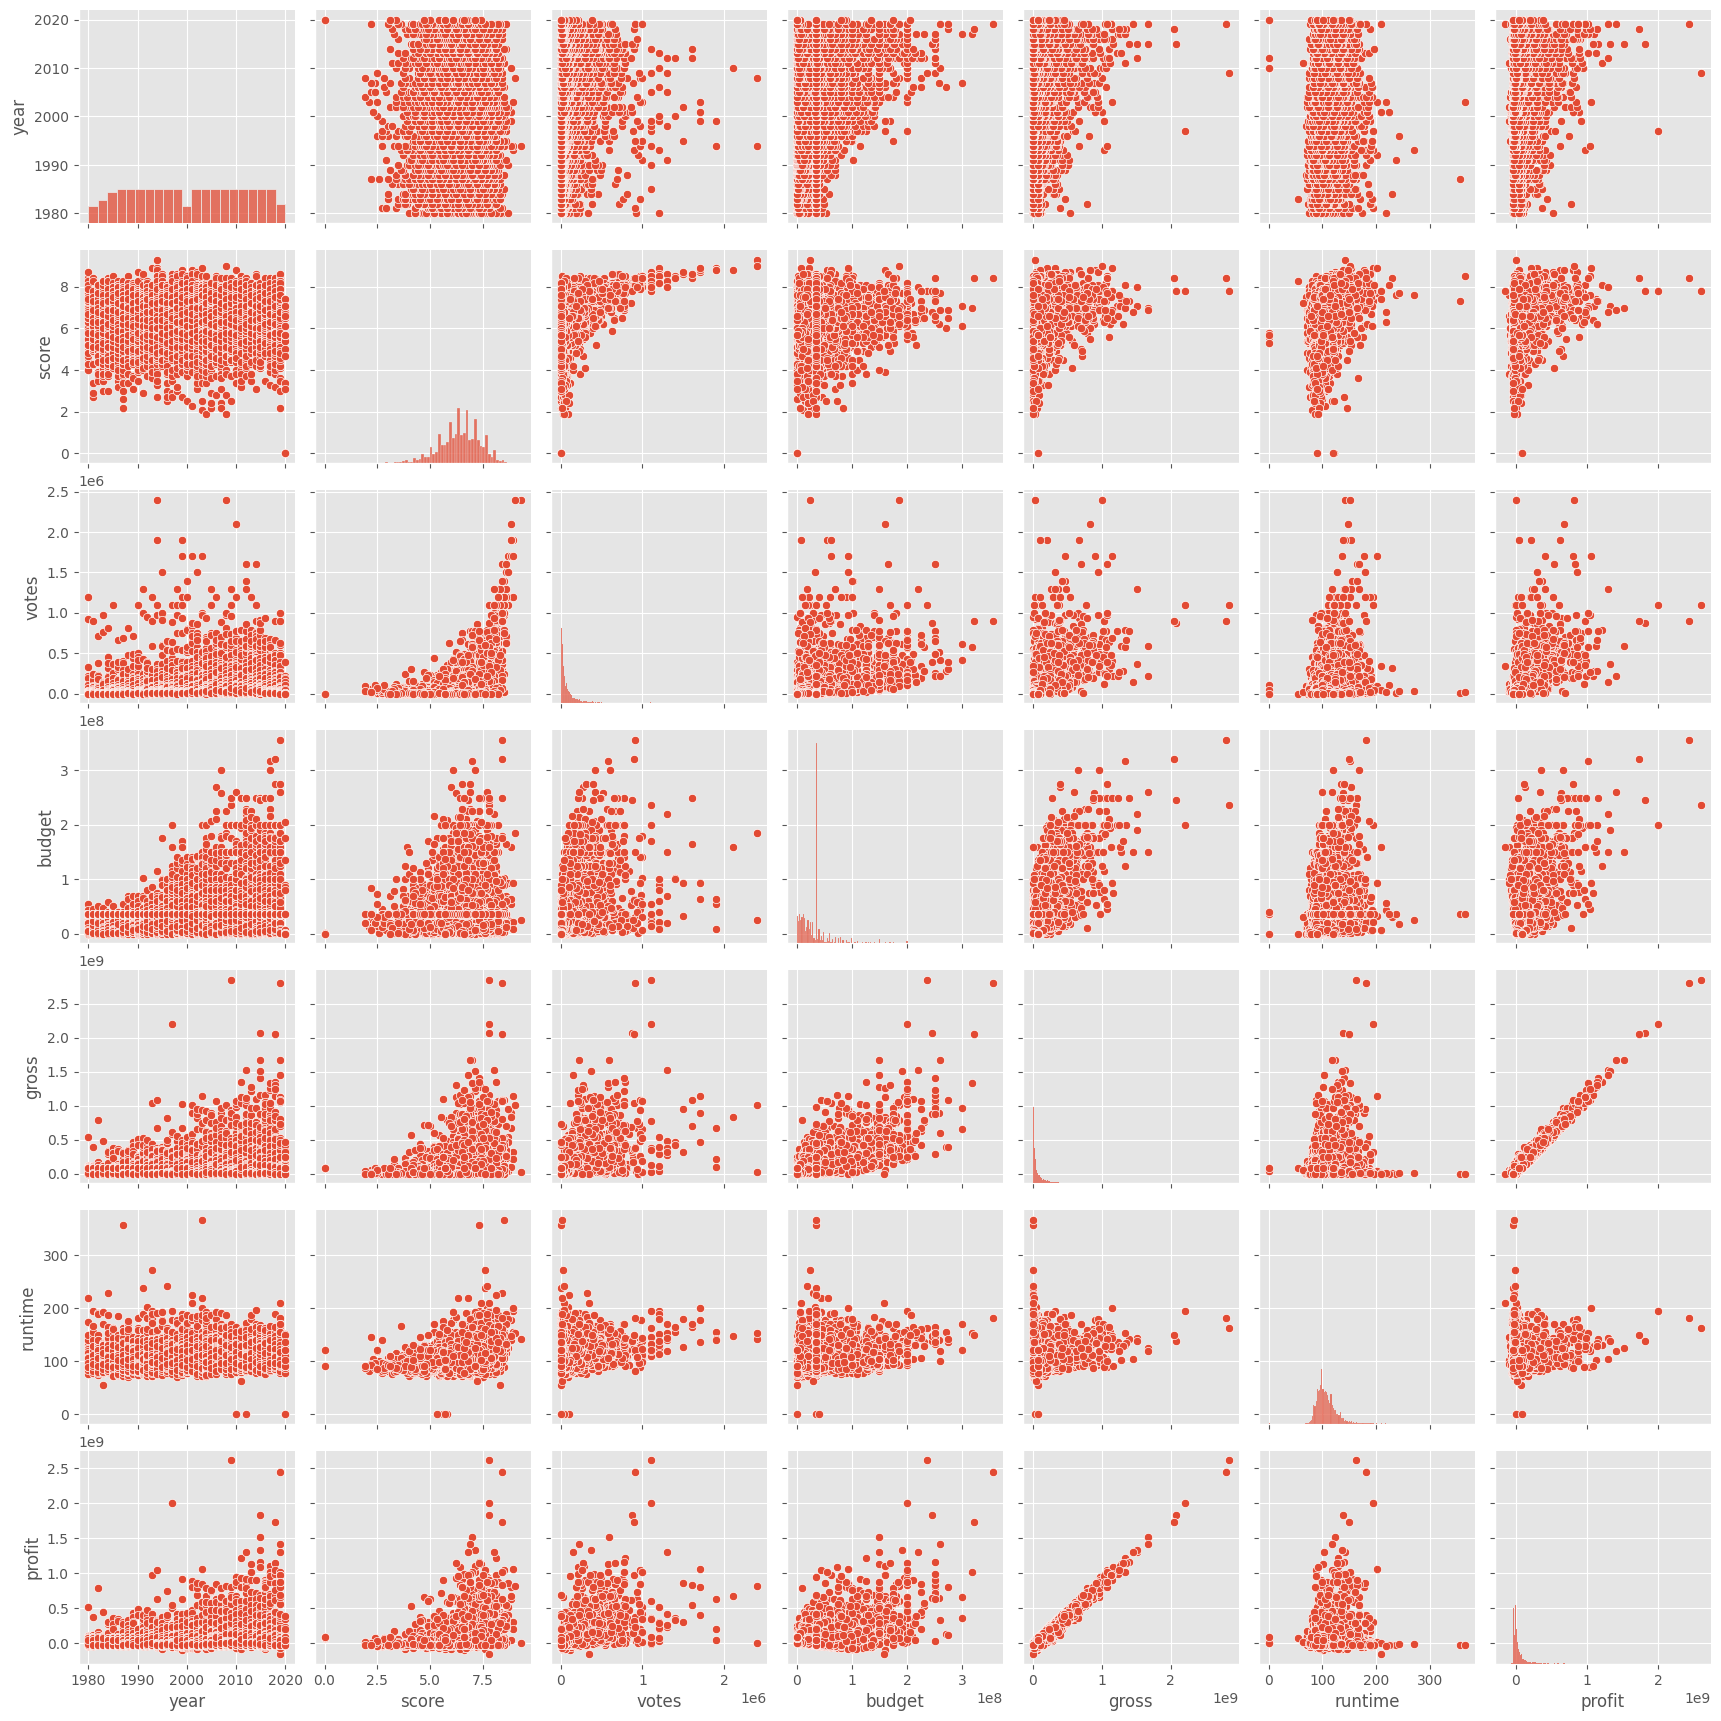

In [112]:
# looking at relationship between variables
sns.pairplot(dfc);

### Movie Ratings Vs Gross Earnings

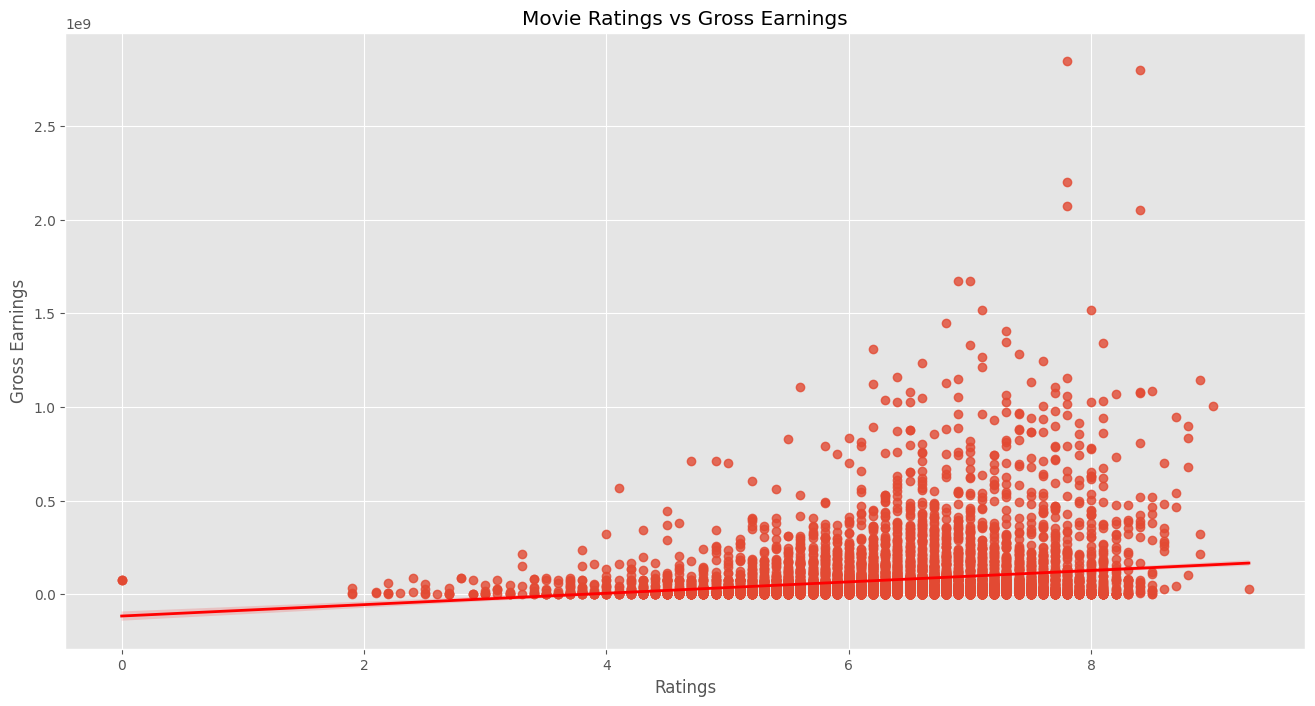

In [113]:
plt.figure(figsize=(16,8))
sns.regplot(x="score", y="gross", data=dfc,line_kws={'lw':2,'color':'red'})
plt.title('Movie Ratings vs Gross Earnings')
plt.xlabel('Ratings')
plt.ylabel('Gross Earnings')
plt.show()

Insight:

- Moves with a score of 6 or higher can bring in additional money (revenue). 

- Because they frequently draw larger audiences, highly rated films make more money than other films. Movies with high scores have typically received favorable reviews and are thought to be of higher quality than other films. High-scoring films will make more money since they have a larger audience because viewers are more likely to pay for a movie they know is of a high quality. Also, highly rated films typically have longer runs at the box office, which means they will ultimately make more money than other films. Also, they are more likely to receive referrals from others, which boosts sales.

### Viewership Vs Gross Earnings

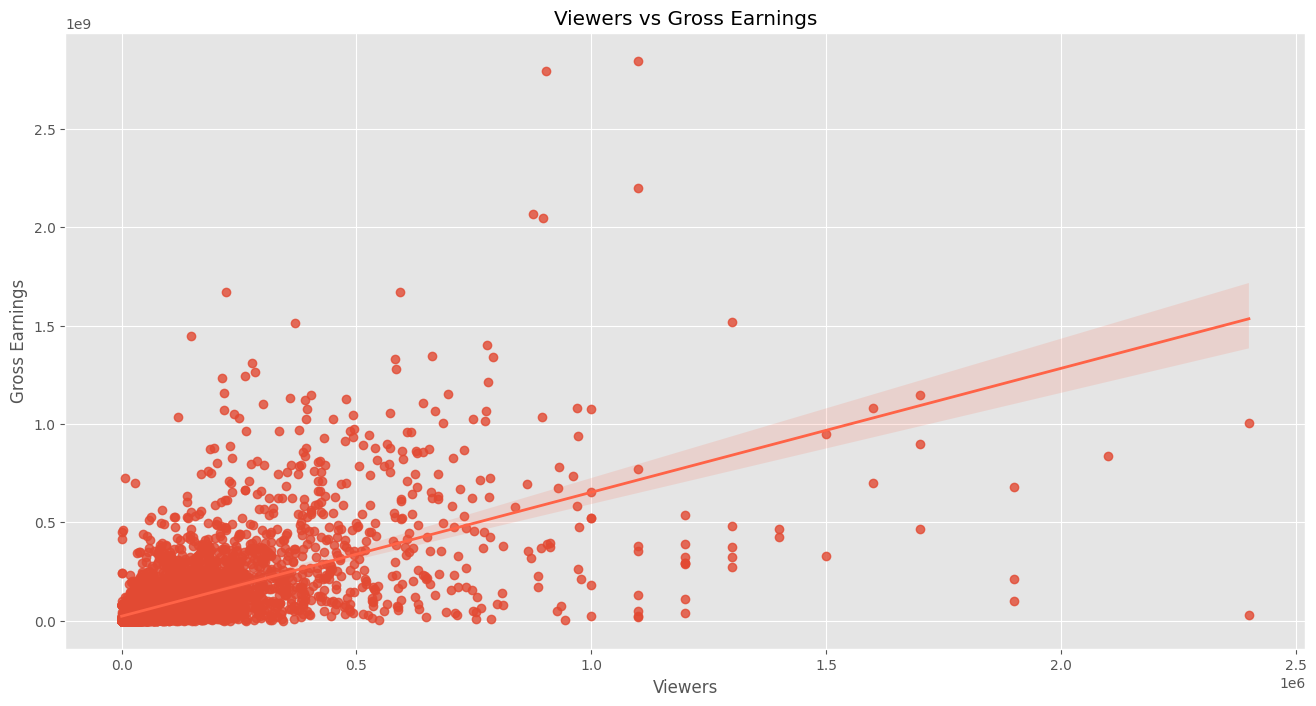

In [114]:
plt.figure(figsize=(16,8))
sns.regplot(x="votes", y="gross", data=dfc,line_kws={'lw':2,'color':'tomato'})
plt.title('Viewers vs Gross Earnings')
plt.xlabel('Viewers')
plt.ylabel('Gross Earnings')
plt.show()

Insight:

Viewers and Gross Earnings were positively associated with the cluster. It signifies that "highly viewed movies typically make more cash than other films since people tend to see and value them more. Because people have heard of and are more inclined to see highly viewed films, they usually perform better at the box office. Also, they frequently spend more on advertising, which may increase ticket sales. A movie is also more likely to be released in more theaters and generate more overall ticket sales when it is more popular. Last but not least, popular films can frequently be distributed in more markets, resulting in increased ticket sales from a larger audience.

**Conclusion:**

1. Avatar, Avengers: Endgame, Titanic, Star Wars: The Force Awakens, and Avengers: Infinity War are the top five highest-grossing movies in the film industry. The success of these movies can be attributed to a variety of factors. Firstly, each film has a dedicated fan base, with well-loved characters and engaging storylines that have captivated audiences worldwide. Additionally, the production teams behind each film put considerable effort into creating stunning visual effects and memorable moments that have left lasting impressions on viewers. Furthermore, these movies have utilized modern marketing and distribution strategies, such as extensive online promotion and prolonged theatrical releases, to reach a wider audience. All these factors have contributed to the remarkable success of these five films, securing their place in history as some of the highest grossing movies of all time.

2. Because it appeals to a wide spectrum of consumers, comedy is one of the most popular movie genres. It frequently serves as a reflection of society and can be a source of lighthearted pleasure and fun. It can also be used to investigate the complexity of interpersonal relationships and make social commentary. Comedy movies frequently have likable, easy-to-root-for characters, as well as witty speech and humorous situations. Also, comedy films can offer a sense of escapism, enabling spectators to laugh off their troubles.

3. More money is needed for animation, action, and adventure films since they require more stunt work, elaborate sets, and special effects. Moreover, animation often takes more time and resources to produce. Also, actors and stunt performers for these kinds of movies frequently need to earn more money than is typical. These are all things that need money, which is why successful films of this genre frequently have higher budgets.

4. Compared to other genres, animation, family, action, and adventure movies are making more money because they appeal to a variety of viewers. While adventure films provide an exciting and thrilling experience, animation, family, and action films may appeal to both children and adults. These genres are more appealing to viewers since they cover a wide range of subjects and contain relatable stories. Also, well-known actors frequently appear in animated, family, and action films, which further draws viewers.

5. The expansion of the film business over the past ten years can be attributed to the rising popularity of 3D and IMAX technologies, which have revitalized the movie-going experience and driven up ticket prices and revenues. Finally, as more people become aware of movies around the world, the expansion of the global market, particularly in Asia, has contributed to increase profits for the industry as a whole.

6. Shawshank Redemption and The Dark Knight are highly regarded films in the movie industry due to their exceptional and impactful cinematic experience. Shawshank Redemption, a drama film adapted from a Stephen King novel, chronicles the wrongful conviction of a prisoner and his journey towards redemption. Starring Morgan Freeman and Tim Robbins, the movie is widely acclaimed for its strong performances and captivating storyline. On the other hand, The Dark Knight, a superhero action film directed by Christopher Nolan, portrays the legendary Batman's crusade to protect Gotham City from the nefarious Joker and other villains. Featuring a stellar cast including Christian Bale, Heath Ledger, and Aaron Eckhart, the film was a major box-office hit and received two Academy Awards. Both movies have left an indelible mark on the film industry and are hailed for their exceptional performances, engrossing plots, and innovative visuals, setting a benchmark for future films in their respective genres.

8. Steven Spielberg's illustrious career as a director has made him one of the most successful and renowned figures in the film industry. He has achieved both critical and commercial success and has created a plethora of iconic films. Some of his highest-grossing films, such as Jaws, E.T. The Extra-Terrestrial, Indiana Jones, Jurassic Park, and Schindler’s List, are among the most popular movies of all time. Spielberg's extraordinary talent has earned him two Academy Awards for Best Director, one for Schindler’s List and another for Saving Private Ryan, and five additional Academy Award nominations. He has also been the recipient of various other prestigious awards and nominations, including three Golden Globe Awards and three BAFTA Awards. Apart from his remarkable contribution to the film industry, Spielberg is also a compassionate philanthropist who established the Starlight Children’s Foundation. His exceptional work has earned him recognition from the Kennedy Center Honors and has cemented his place as one of the most successful directors in the history of cinema.

9. Due to the thrilling, fascinating, and engaging experiences they offer viewers, action, comedy, and drama are some of the most popular genres in the film industry.

10. With more than twice as many films produced as any other nation, the United States is the world's top film producer. 

11. With almost 280 billion US dollars in revenue, parental counsel for kids under 13 (PG-13) has the greatest gross. 

12. For many years, Warner Brothers has been among the most prosperous businesses in the film industry. They have regularly created some of the most enduring and popular movies ever. 

13. The film business generated $19 billion in revenue in 2018 compared to $15 billion for Netflix. This proves that the movie industry is not dominated by the streaming sector.

14. Streaming services are relatively young compared to the movie business, so they haven't had as much time to establish the same amount of customer loyalty, trust, or size of operations. However, streaming providers must spend a lot of money buying content, which reduces their earnings. Furthermore, streaming services sometimes compete with free or inexpensive services like YouTube, which can make it more challenging to make money. Finally, whereas the film business makes money from ticket sales, goods sales, and other sources, streaming services often make money from membership fees.

15. Due to its longer history and wider consumer base, the cinema industry has been making more money than the streaming industry. The cinema business is able to make more money from ticket sales and other sources since the production expenditures for making movies are substantially higher than those for streaming material. Additionally, films generate income via DVD sales, television airings, and online streaming, all of which are not available to the streaming sector. Last but not least, movies have far greater production values than streaming media, which frequently results in more expensive tickets and higher box office receipts. 